# Исследование продаж игр в интернет-магазине «Стримчик»

Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанрах и платформах (например, Xbox или PlayStation) до 2016 года. Нужно выявить определяющие успешность игры закономерности для планирования рекламных кампаний и выявления потенциально популярных продуктов.

## Открытие файла и изучение общей информации

In [1]:
import pandas as pd
import numpy as np

from scipy import stats as st

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('/Users/nqzhenya/ya_praktikum_projects/datasets/P2_games_sales_research/games.csv')
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Проверяем информацию о файле

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Необходимо привести названия столбцов к одному виду. В столбцах Name, Year_of_Release, Genre, Critic_Score, Critic_Score, Rating есть пропущенные значения. В столбцах Year_of_Release и User_Score нужно поменять типы данных.

Строим гистограммы для каждого столбца:

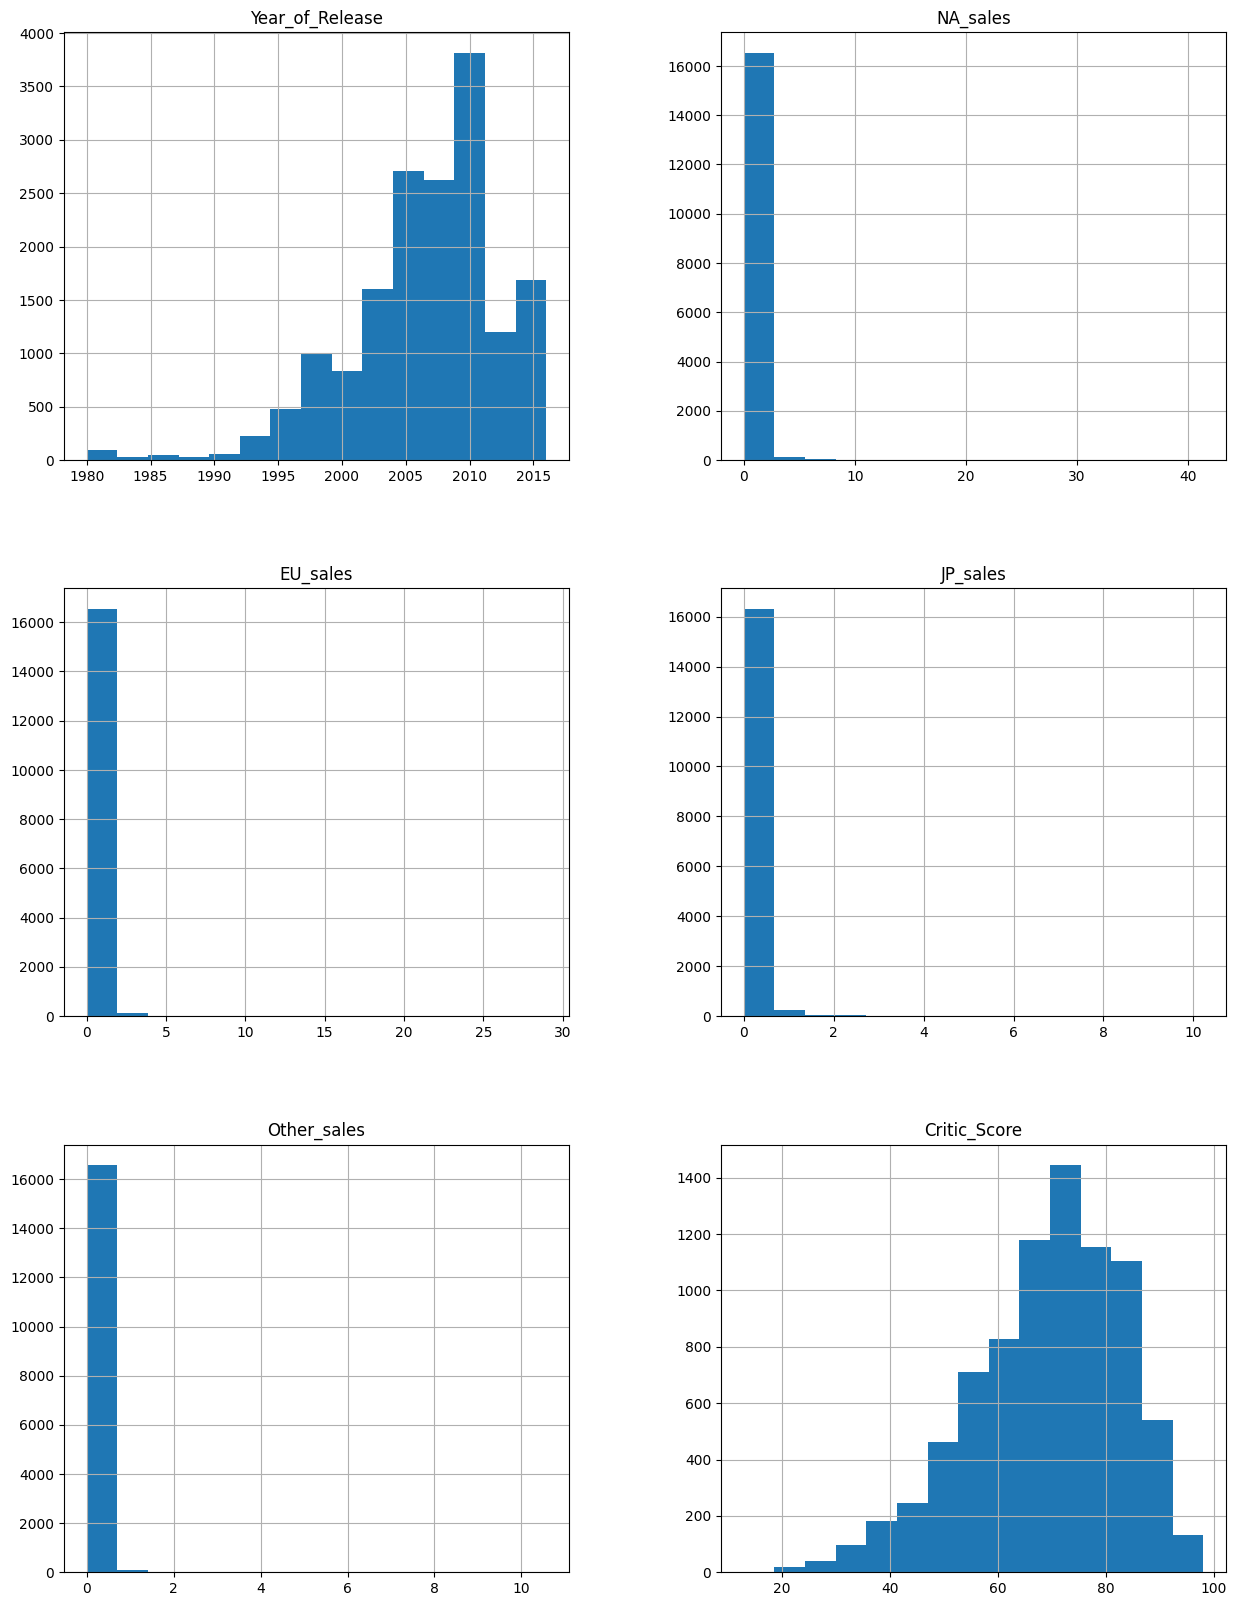

In [4]:
data.hist(bins=15, figsize=(15, 20));

Статистическая информация по каждому столбцу:

In [5]:
data.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


В столбцах с продажами и оценками нужно проверить минимальные и максимальные значения для поиска выбросов

Необходимо произвести предобработку данных: привести названия столбцов к одному виду, заполнить пропущенные значения, найти выбросы и аномалии.

## Предобработка данных

### Обработка названий столбцов

In [6]:
data.columns = data.columns.str.lower()

### Замена типов данных

Меняем тип данных в столбцу с рейтингом пользователей на float:

In [7]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

В этом столбце, кроме отсутсвующих значений есть значения "tbd", что указывает на то, что рейтинг еще не определен. Заменим это значение на nan.

In [8]:
data['user_score'] = data['user_score'].replace('tbd', np.NaN)

In [9]:
data.loc[
    data['user_score'].isna() == False,
    'user_score'
] = data.loc[
    data['user_score'].isna() == False,
    'user_score'
].astype(float)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [11]:
def isna_view (df):
    return  (
                (df.isna().mean()*100)
                .sort_values(ascending=False)
                .to_frame()
                .rename(columns = {0:'percent_space'})
            )

isna_view (data)

,percent_space
user_score,54.591684
critic_score,51.319174
rating,40.478612
year_of_release,1.609333
name,0.011965
genre,0.011965
platform,0.000000
na_sales,0.000000
eu_sales,0.000000
jp_sales,0.000000


### Обработка столбца name

Проверим данные с пропущенными значениями в столбце с названиями

In [12]:
data.query('name.isna()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


У этих игр также не заполнены названия жанров и рейтинги, а также год выпуска игры 1993, а значит данные не актуальны для поставленной задачи, поэтому удаляем эти строки.

In [13]:
data = data.drop([659, 14244])

Находим дубликаты в столбце name. Перед этим приведем названия к нижнему регистру, сохраним их в новом столбце lowercase_name

In [14]:
data['lowercase_name'] = data['name'].str.lower()

In [15]:
data[data.duplicated(subset='lowercase_name', keep=False)].sort_values(by='name')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,lowercase_name
3862,Frozen: Olaf's Quest,DS,2013.0,Platform,0.21,0.26,0.00,0.04,NaN,NaN,NaN,frozen: olaf's quest
3358,Frozen: Olaf's Quest,3DS,2013.0,Platform,0.27,0.27,0.00,0.05,NaN,NaN,NaN,frozen: olaf's quest
14658,007: Quantum of Solace,PC,2008.0,Action,0.01,0.01,0.00,0.00,70.0,6.3,T,007: quantum of solace
9507,007: Quantum of Solace,DS,2008.0,Action,0.11,0.01,0.00,0.01,65.0,NaN,T,007: quantum of solace
3120,007: Quantum of Solace,Wii,2008.0,Action,0.29,0.28,0.01,0.07,54.0,7.5,T,007: quantum of solace
...,...,...,...,...,...,...,...,...,...,...,...,...
2583,pro evolution soccer 2011,PSP,2010.0,Sports,0.05,0.30,0.29,0.16,74.0,5.8,E,pro evolution soccer 2011
7149,pro evolution soccer 2011,Wii,2010.0,Sports,0.07,0.10,0.03,0.02,78.0,5.4,E,pro evolution soccer 2011
12648,pro evolution soccer 2011,PC,2010.0,Sports,0.00,0.05,0.00,0.01,79.0,NaN,NaN,pro evolution soccer 2011
15612,uDraw Studio: Instant Artist,X360,2011.0,Misc,0.01,0.01,0.00,0.00,54.0,5.7,E,udraw studio: instant artist


Некоторые из игр выходят на разных платформах, поэтому могут встречаться дубликаты в столбце с названиями, при этом платформы для этих дубликатов указаны разные. Проверим это. Для начала также приведем к одному виду названия жанров и платформ и проверим их на дубликаты

In [16]:
data['platform'].sort_values().unique()

array(['2600', '3DO', '3DS', 'DC', 'DS', 'GB', 'GBA', 'GC', 'GEN', 'GG',
       'N64', 'NES', 'NG', 'PC', 'PCFX', 'PS', 'PS2', 'PS3', 'PS4', 'PSP',
       'PSV', 'SAT', 'SCD', 'SNES', 'TG16', 'WS', 'Wii', 'WiiU', 'X360',
       'XB', 'XOne'], dtype=object)

In [17]:
data['genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

In [18]:
data['genre'] = data['genre'].str.lower()

In [19]:
data[data.duplicated(subset=['lowercase_name', 'platform'], keep=False)].sort_values(by='name')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,lowercase_name
604,Madden NFL 13,PS3,2012.0,sports,2.11,0.22,0.00,0.23,83.0,5.5,E,madden nfl 13
16230,Madden NFL 13,PS3,2012.0,sports,0.00,0.01,0.00,0.00,83.0,5.5,E,madden nfl 13
1190,Need for Speed: Most Wanted,X360,2012.0,racing,0.62,0.78,0.01,0.15,83.0,8.5,T,need for speed: most wanted
1591,Need for Speed: Most Wanted,X360,2005.0,racing,1.00,0.13,0.02,0.10,83.0,8.5,T,need for speed: most wanted
5972,Need for Speed: Most Wanted,PC,2005.0,racing,0.02,0.23,0.00,0.04,82.0,8.5,T,need for speed: most wanted
11715,Need for Speed: Most Wanted,PC,2012.0,racing,0.00,0.06,0.00,0.02,82.0,8.5,T,need for speed: most wanted
1745,Sonic the Hedgehog,PS3,2006.0,platform,0.41,0.06,0.04,0.66,43.0,4.1,E10+,sonic the hedgehog
4127,Sonic the Hedgehog,PS3,NaN,platform,0.00,0.48,0.00,0.00,43.0,4.1,E10+,sonic the hedgehog


Найдем игры с именами, как у дублирующихся

In [20]:
data[data['lowercase_name'].str.contains('madden nfl 13')]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,lowercase_name
507,Madden NFL 13,X360,2012.0,sports,2.53,0.15,0.0,0.17,81.0,5.8,E,madden nfl 13
604,Madden NFL 13,PS3,2012.0,sports,2.11,0.22,0.0,0.23,83.0,5.5,E,madden nfl 13
3986,Madden NFL 13,Wii,2012.0,sports,0.47,0.00,0.0,0.03,NaN,7.3,E,madden nfl 13
5887,Madden NFL 13,PSV,2012.0,sports,0.28,0.00,0.0,0.02,63.0,7.3,E,madden nfl 13
7066,Madden NFL 13,WiiU,2012.0,sports,0.21,0.00,0.0,0.02,75.0,6.7,E,madden nfl 13
16230,Madden NFL 13,PS3,2012.0,sports,0.00,0.01,0.0,0.00,83.0,5.5,E,madden nfl 13


В этом случае все параметры игр совпадают, кроме продаж. У других строк с такими именами другие рейтинги и оценки. Объединяем строки с индексами 604 и 16230.

In [21]:
data.loc[604, 'eu_sales'] = data.loc[604, 'eu_sales'] + data.loc[16230, 'eu_sales']
data = data.drop(16230)

In [22]:
data[data['lowercase_name'].str.contains('need for speed: most wanted')].sort_values(by='platform')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,lowercase_name
6410,Need for Speed: Most Wanted,DS,2005.0,racing,0.24,0.01,0.00,0.02,45.0,6.1,E,need for speed: most wanted
6473,Need for Speed: Most Wanted,GBA,2005.0,racing,0.19,0.07,0.00,0.00,NaN,8.3,E,need for speed: most wanted
3581,Need for Speed: Most Wanted,GC,2005.0,racing,0.43,0.11,0.00,0.02,80.0,9.1,T,need for speed: most wanted
5972,Need for Speed: Most Wanted,PC,2005.0,racing,0.02,0.23,0.00,0.04,82.0,8.5,T,need for speed: most wanted
11715,Need for Speed: Most Wanted,PC,2012.0,racing,0.00,0.06,0.00,0.02,82.0,8.5,T,need for speed: most wanted
253,Need for Speed: Most Wanted,PS2,2005.0,racing,2.03,1.79,0.08,0.47,82.0,9.1,T,need for speed: most wanted
523,Need for Speed: Most Wanted,PS3,2012.0,racing,0.71,1.46,0.06,0.58,NaN,NaN,NaN,need for speed: most wanted
810,Need for Speed: Most Wanted 5-1-0,PSP,2005.0,racing,1.77,0.12,0.02,0.17,72.0,7.8,E10+,need for speed: most wanted 5-1-0
2048,Need for Speed: Most Wanted,PSV,2012.0,racing,0.33,0.45,0.01,0.22,NaN,NaN,NaN,need for speed: most wanted
6273,Need for Speed: Most Wanted,WiiU,2013.0,racing,0.13,0.12,0.00,0.02,NaN,NaN,NaN,need for speed: most wanted


В этом случае в 2012 году вышел перевыпуск игры 2005 года. Поменяем название игры вышедшей не в 2005 году

In [23]:
data.loc[
    (data['lowercase_name'].str.contains('need for speed: most wanted'))&
    (data['year_of_release'] > 2005),
    'name'
] = 'Need for Speed: Most Wanted (2012)'

In [24]:
data[data['lowercase_name'].str.contains('sonic the hedgehog')]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,lowercase_name
145,Sonic the Hedgehog 2,GEN,1992.0,platform,4.47,1.20,0.16,0.19,NaN,NaN,NaN,sonic the hedgehog 2
257,Sonic the Hedgehog,GEN,1991.0,platform,3.03,0.91,0.26,0.13,NaN,NaN,NaN,sonic the hedgehog
996,Sonic the Hedgehog 3,GEN,1994.0,platform,1.02,0.47,0.20,0.07,NaN,NaN,NaN,sonic the hedgehog 3
1745,Sonic the Hedgehog,PS3,2006.0,platform,0.41,0.06,0.04,0.66,43.0,4.1,E10+,sonic the hedgehog
1996,Sonic the Hedgehog,X360,2006.0,platform,0.44,0.48,0.00,0.11,46.0,4.4,E10+,sonic the hedgehog
4127,Sonic the Hedgehog,PS3,NaN,platform,0.00,0.48,0.00,0.00,43.0,4.1,E10+,sonic the hedgehog
13571,Sonic the Hedgehog 2 (8-bit),GG,1992.0,platform,0.00,0.00,0.04,0.00,NaN,NaN,NaN,sonic the hedgehog 2 (8-bit)


В этом случае также нужно объединить строки 1745 и 4127

In [25]:
data.loc[1745, 'eu_sales'] = data.loc[1745, 'eu_sales'] + data.loc[4127, 'eu_sales']
data = data.drop(4127)

### Обработка столбца year_of_release

In [26]:
data['year_of_release'].sort_values().unique()

array([1980., 1981., 1982., 1983., 1984., 1985., 1986., 1987., 1988.,
       1989., 1990., 1991., 1992., 1993., 1994., 1995., 1996., 1997.,
       1998., 1999., 2000., 2001., 2002., 2003., 2004., 2005., 2006.,
       2007., 2008., 2009., 2010., 2011., 2012., 2013., 2014., 2015.,
       2016.,   nan])

In [27]:
data[data['year_of_release'].isna()].shape

(268, 12)

Данные в таблице есть за каждый год с 1980 по 2016. Отсутсвуют данные о годах выхода 268 игр. Заполним пропуски для тех игр, которые будут необходимы для анализа позже, когда определим актуальный период для исследования. Также поступим для других столбцов.

## Выбор периода для проведения анализа

Гистограмма распределения выхода игр по годам:

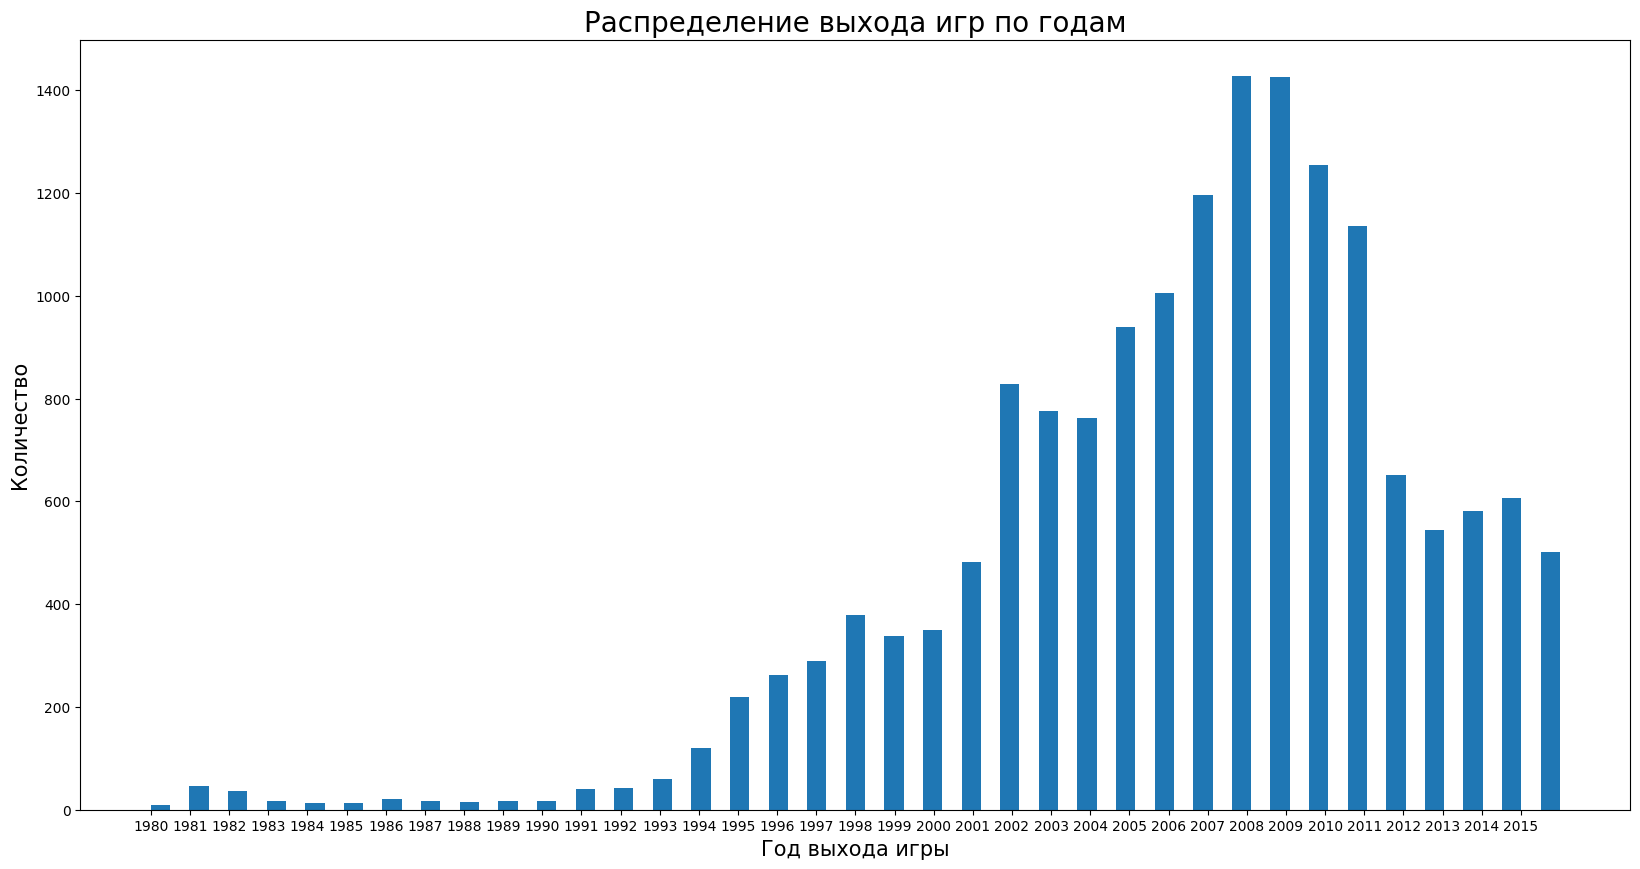

In [28]:
ax = data['year_of_release'].plot(
    kind='hist', 
    bins=73, 
    figsize=(20,10), 
    xticks=range(1980, 2016)
)
ax.set_xlabel('Год выхода игры', fontsize=15)
ax.set_ylabel('Количество', fontsize=15)
ax.set_title('Распределение выхода игр по годам', fontsize=20)
plt.show;

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16711 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16711 non-null  object 
 1   platform         16711 non-null  object 
 2   year_of_release  16443 non-null  float64
 3   genre            16711 non-null  object 
 4   na_sales         16711 non-null  float64
 5   eu_sales         16711 non-null  float64
 6   jp_sales         16711 non-null  float64
 7   other_sales      16711 non-null  float64
 8   critic_score     8135 non-null   float64
 9   user_score       7588 non-null   object 
 10  rating           9947 non-null   object 
 11  lowercase_name   16711 non-null  object 
dtypes: float64(6), object(6)
memory usage: 1.7+ MB


Создаем столбец с суммарными продажами во всех регионах

In [30]:
data['sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

Проверим актуальные платформы на 2016 год

In [31]:
data.query(
    'year_of_release == 2016'
).pivot_table(
    index='platform', 
    values='sales',
    aggfunc='count'
)

,sales
platform,
3DS,46
PC,54
PS3,38
PS4,164
PSV,85
Wii,1
WiiU,14
X360,13
XOne,87


Найдем платформы с самами большими продажами:

In [32]:
data.pivot_table(index='platform', values='sales',  aggfunc='sum').sort_values('sales', ascending=False).head(20)

,sales
platform,
PS2,1255.77
X360,971.42
PS3,939.65
Wii,907.51
DS,806.12
PS,730.86
GBA,317.85
PS4,314.14
PSP,294.05


Построим гистограммы распределения выхода игр по годам для 10 платформ с самыми большими продажами игр

In [33]:
top_10_platforms = data.pivot_table(
    index='platform', 
    values='sales',  
    aggfunc='sum'
).sort_values('sales', ascending=False).head(10).index

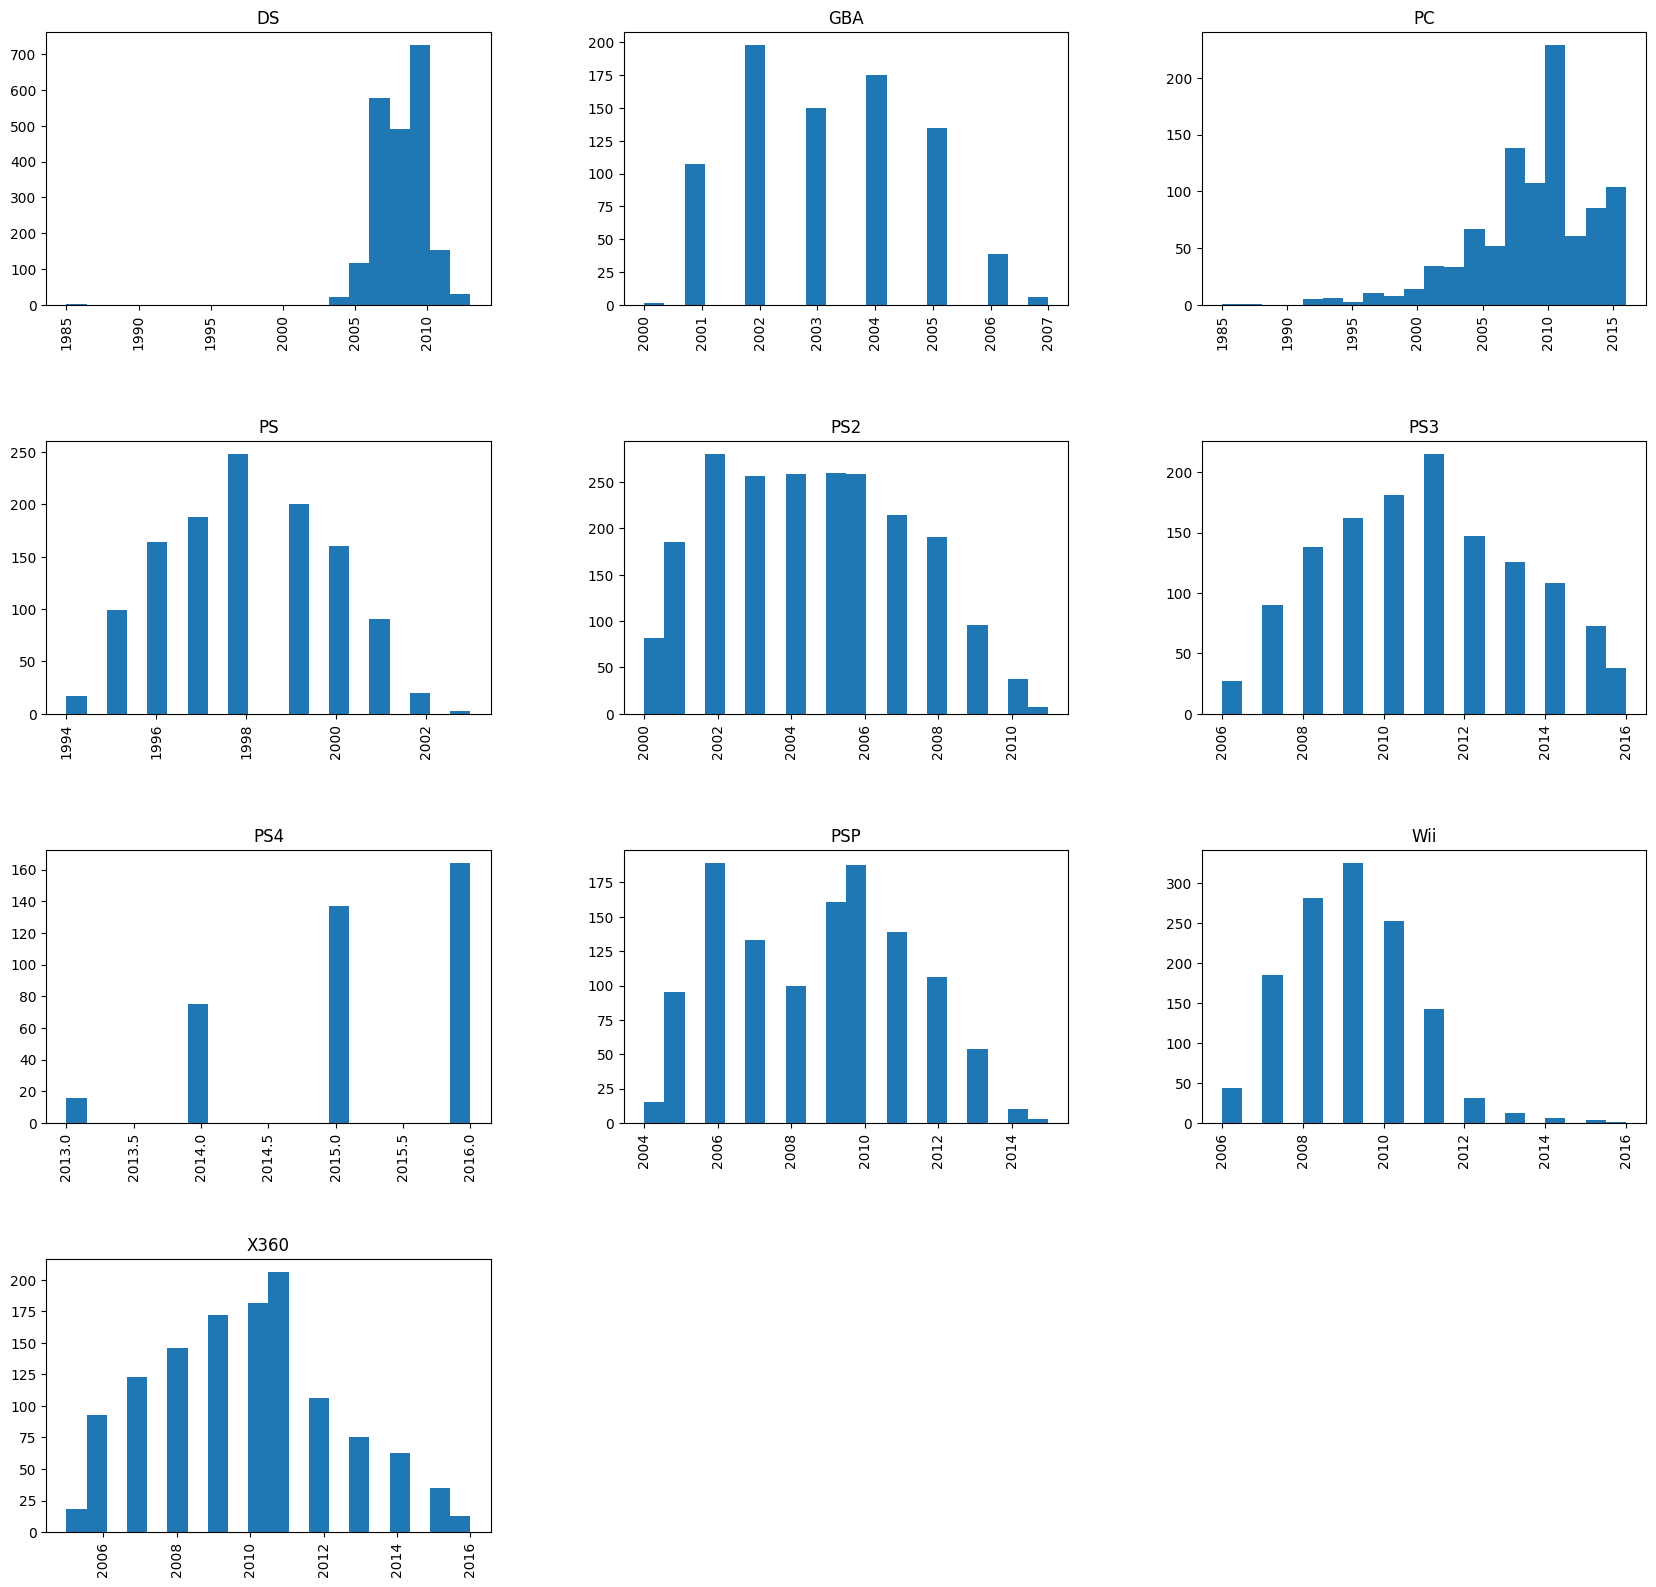

In [34]:
data.query('platform.isin(@top_10_platforms)').hist(column='year_of_release', by='platform', figsize=(20,20), bins=20);

Проверим данные платформы DS. Строим диаграмму размаха

<Axes: >

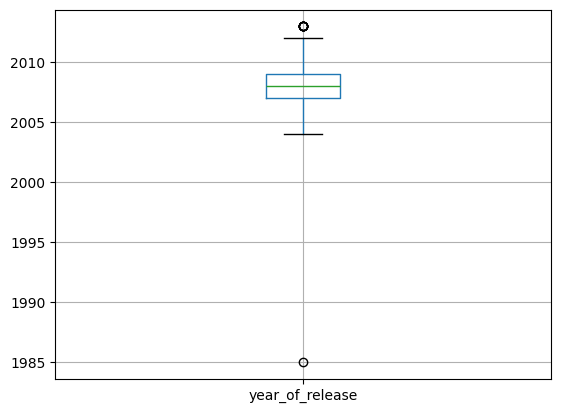

In [35]:
data.query('platform == "DS"').boxplot('year_of_release')

Проверим данные по этой платформе с годом выпуска до 2000

In [36]:
data.query('platform == "DS" and year_of_release < 2000')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,lowercase_name,sales
15957,Strongest Tokyo University Shogi DS,DS,1985.0,action,0.0,0.0,0.02,0.0,NaN,NaN,NaN,strongest tokyo university shogi ds,0.02


Удаляем этот выброс

In [37]:
data = data.drop(15957)

Найдем сколько лет в среднем выпускаются игры на каждой платформе

In [38]:
actual_platforms = data.query('year_of_release == 2016')['platform'].unique()

In [39]:
years_p = []
platforms = []

for p in data.query('platform not in @actual_platforms')['platform'].unique():
    years_p.append(
        data.query(
            'platform == @p and year_of_release.isna() == False'
        )['year_of_release'].unique().max() - data.query(
            'platform == @p and year_of_release.isna() == False'
        )['year_of_release'].unique().min()
    )
    platforms.append(p)

In [40]:
years_platform = pd.DataFrame(years_p, columns=['years'], index=platforms)

Строим график:

<Axes: >

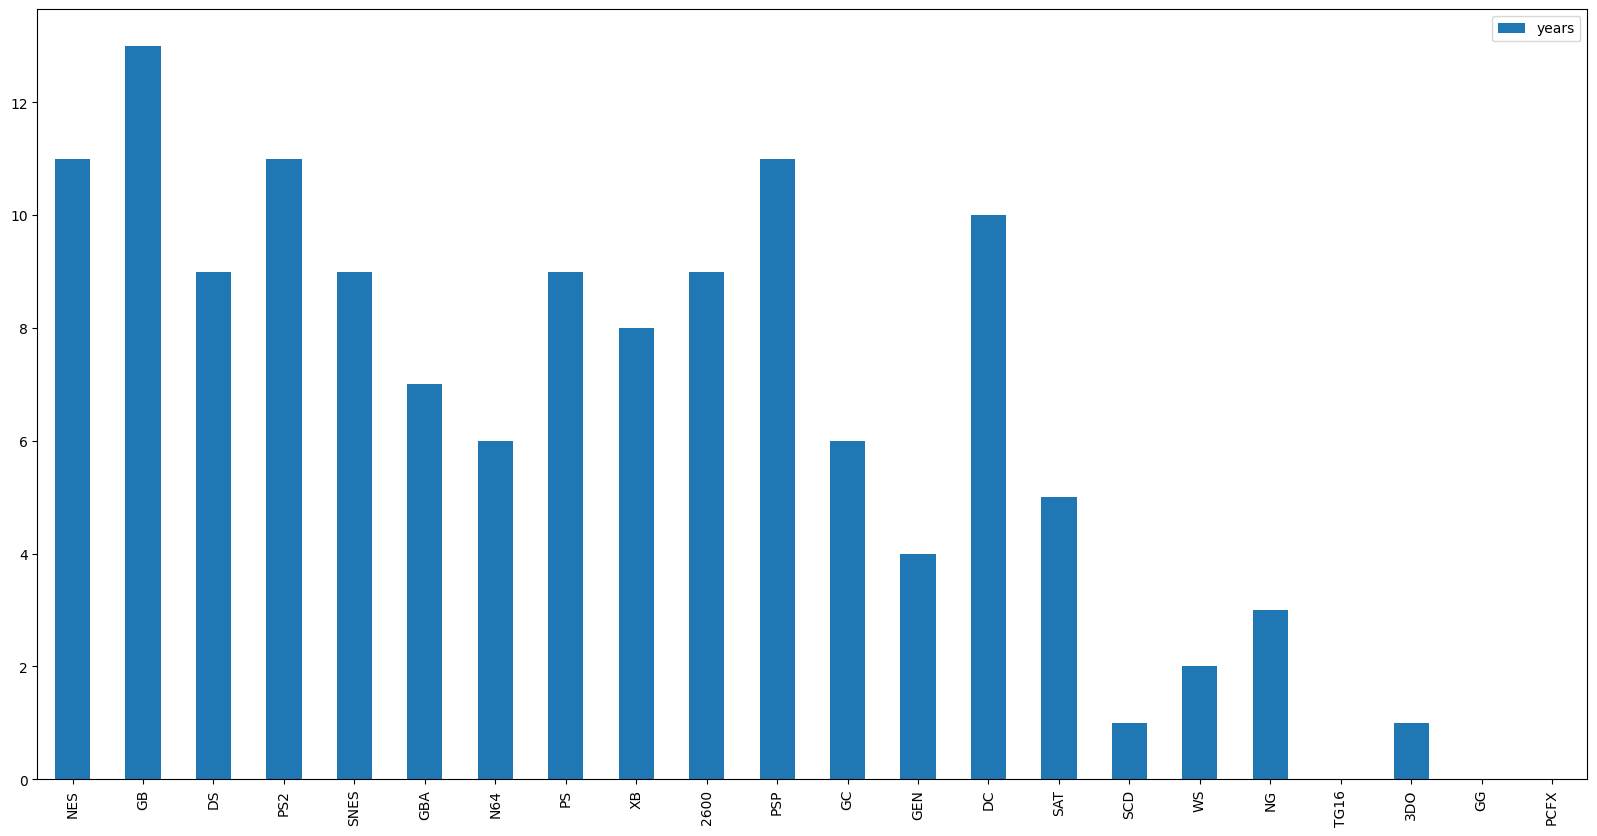

In [41]:
years_platform.plot(kind='bar', figsize=(20, 10))

Так как в данных есть выбросы, находим медиану:

In [42]:
years_platform['years'].median()

6.5

In [43]:
actual_platforms

array(['PS4', '3DS', 'XOne', 'WiiU', 'PS3', 'PC', 'X360', 'PSV', 'Wii'],
      dtype=object)

In [44]:
year_of_platform_release = data.query('platform.isin(@actual_platforms)').pivot_table(
    index='platform', 
    values='year_of_release',
    aggfunc='min'
)
year_of_platform_release['years'] = 2016-year_of_platform_release['year_of_release']
year_of_platform_release.sort_values('years')

,year_of_release,years
platform,,
PS4,2013.0,3.0
XOne,2013.0,3.0
WiiU,2012.0,4.0
3DS,2011.0,5.0
PSV,2011.0,5.0
PS3,2006.0,10.0
Wii,2006.0,10.0
X360,2005.0,11.0
PC,1985.0,31.0


За исключением PC, с учетом "жизни" платформы в 6,5 лет, есть 2 платформы которые будут развиваться: PS4 и XOne, поэтому будем исследовать период с 2013 года (год выхода перспективных платформ)

In [45]:
all_data = data.copy()
data = data.query('year_of_release > 2012')

### Окончатльная предобработка данных

Проверяем информацию о файле

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2233 entries, 16 to 16714
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             2233 non-null   object 
 1   platform         2233 non-null   object 
 2   year_of_release  2233 non-null   float64
 3   genre            2233 non-null   object 
 4   na_sales         2233 non-null   float64
 5   eu_sales         2233 non-null   float64
 6   jp_sales         2233 non-null   float64
 7   other_sales      2233 non-null   float64
 8   critic_score     991 non-null    float64
 9   user_score       1192 non-null   object 
 10  rating           1256 non-null   object 
 11  lowercase_name   2233 non-null   object 
 12  sales            2233 non-null   float64
dtypes: float64(7), object(6)
memory usage: 244.2+ KB


Пропущенных значений в столбце с годами выпуска нет, заменяем тип данных на int:

In [47]:
data['year_of_release'] = data['year_of_release'].astype('int')

Также меняем тип данных в столбце user_score

In [48]:
data['user_score'] = data['user_score'].astype('float64')

Пробуем заполнить пропуски в столбцах с рейтингами критиков и пользователей. Проверим влияние этих рейтингов друг на друга, для этого построим диаграмму рассеяния и найдем коэффициент корреляции этих параметров

<Axes: xlabel='critic_score', ylabel='[user_score]'>

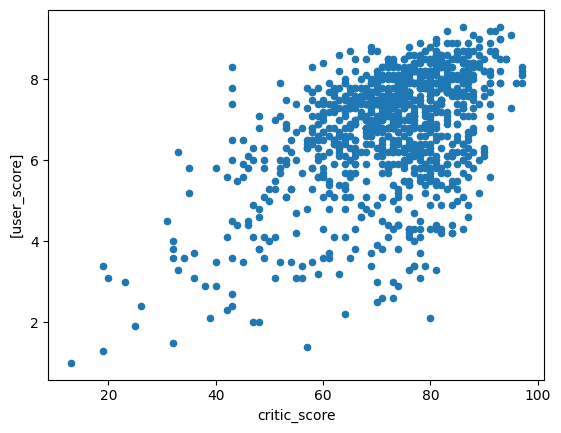

In [49]:
data.plot(kind='scatter', x='critic_score', y=['user_score'])

Нужно искать корреляцию за исключенем нулевых оценок пользователей, так как выше было определено, что это указывает на то, что данный рейтинг еще не сформирован

In [50]:
data.query('user_score!=0')['user_score'].corr(data.query('user_score!=0')['critic_score'])

0.5022214065128168

Заполнять отсутсвующие значения рейтингов по другому рейтингу невозможно, так как корреляция этих параметров низкая. Пробуем заполнить по рейтингу таких же игр на других платформах, для этого найдем средние рейтинги каждой игры. В столбец difference записываем разницу между истинным значением и найденным с помощью усреднения рейтингов игр с одинаковыми названиями

In [51]:
mean_critic_score = data.pivot_table(index='lowercase_name', values='critic_score', aggfunc=['mean', 'count'])
mean_critic_score.columns = ['mean', 'count']
mean_critic_score.sort_values('count')

,mean,count
lowercase_name,,
call of duty: modern warfare trilogy,NaN,0
infinite stratos 2: ignition hearts,NaN,0
inazuma eleven go 3: galaxy,NaN,0
inazuma eleven 3,NaN,0
ia/vt colorful,NaN,0
...,...,...
need for speed rivals,77.400000,5
terraria,80.833333,6
the lego movie videogame,70.833333,6


In [52]:
compare_critic_score = data.join(
    mean_critic_score, on=['lowercase_name'], rsuffix='_median'
)[['lowercase_name', 'platform', 'year_of_release', 'critic_score', 'mean', 'count']]
compare_critic_score['difference'] = compare_critic_score['mean'] / compare_critic_score['critic_score']
compare_critic_score.sort_values('difference', ascending=False)

,lowercase_name,platform,year_of_release,critic_score,mean,count,difference
11437,risen 3: titan lords,PS3,2014,36.0,48.333333,3,1.342593
2313,lego marvel super heroes,3DS,2013,61.0,77.666667,6,1.273224
13689,ride to hell,PS3,2013,13.0,16.000000,2,1.230769
9511,watch dogs,WiiU,2014,62.0,74.250000,4,1.197581
3748,lego dimensions,WiiU,2015,62.0,74.000000,3,1.193548
...,...,...,...,...,...,...,...
16703,strawberry nauts,PSV,2016,NaN,NaN,0,NaN
16707,aiyoku no eustia,PSV,2014,NaN,NaN,0,NaN
16710,samurai warriors: sanada maru,PS3,2016,NaN,NaN,0,NaN
16712,haitaka no psychedelica,PSV,2016,NaN,NaN,0,NaN


Строим диаграмму размаха, находим статистические показатели и считаем количество значений попадающих в интервал от 0,9 до 1,1 чтобы при заполнении оценок по средним, числовое значение оценки попало хотя бы в тот же порядок

<Axes: >

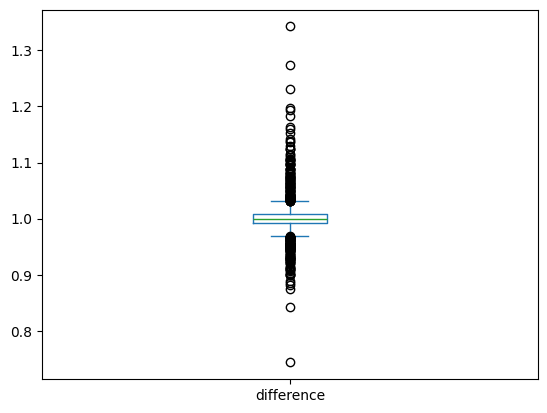

In [53]:
compare_critic_score['difference'].plot(kind='box')

In [54]:
compare_critic_score['difference'].describe()

count    991.000000
mean       1.001575
std        0.040517
min        0.743590
25%        0.992016
50%        1.000000
75%        1.007812
max        1.342593
Name: difference, dtype: float64

In [55]:
compare_critic_score.query('0.9 < difference < 1.1')['difference'].shape

(957,)

34 значения не попали в данный интервал, а значит заполнить верно оценки таким способом также не получится. Оставляем пропуски

In [56]:
data[data['lowercase_name'].str.contains('fifa 14')]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,lowercase_name,sales
126,FIFA 14,PS3,2013,sports,0.78,4.24,0.07,1.37,86.0,4.3,E,fifa 14,6.46
271,FIFA 14,X360,2013,sports,0.92,2.89,0.01,0.40,84.0,4.2,E,fifa 14,4.22
469,FIFA 14,PS4,2013,sports,0.61,1.85,0.11,0.44,87.0,6.3,E,fifa 14,3.01
1753,FIFA 14,XOne,2013,sports,0.41,0.66,0.00,0.09,88.0,5.8,E,fifa 14,1.16
4699,FIFA 14,PSV,2013,sports,0.08,0.23,0.01,0.09,NaN,1.8,E,fifa 14,0.41
4809,FIFA 14,PC,2013,sports,0.01,0.36,0.00,0.03,87.0,4.6,E,fifa 14,0.40
4985,FIFA 14,Wii,2013,sports,0.00,0.36,0.00,0.02,NaN,4.3,E,fifa 14,0.38
6871,FIFA 14,3DS,2013,sports,0.00,0.22,0.00,0.01,NaN,NaN,NaN,fifa 14,0.23
7875,FIFA 14,PSP,2013,sports,0.00,0.15,0.00,0.04,NaN,3.4,E,fifa 14,0.19


На этом примере видно, что заполнение пользовательского рейтинга таким способом также не получится

Заполняем пропуски в столбце rating по рейтингу игр с таким же названием

In [57]:
no_rating_names = data[data['rating'].isna()]['lowercase_name'].unique()

In [58]:
for r in data['rating'].unique():
    data.loc[
        data['lowercase_name'].isin(
            data.query(
                'lowercase_name in @no_rating_names and rating.isna() == False and rating == @r'
            )['lowercase_name'].unique())&
        data['rating'].isna(),
        'rating'
    ] = r

Смотрим распределение рейтингов по жанрам и по платформам

In [59]:
rat_by_genre = data.pivot_table(index=['rating'], columns=['genre'], values='sales', aggfunc='count')
rat_by_genre

genre,action,adventure,fighting,misc,platform,puzzle,racing,role-playing,shooter,simulation,sports,strategy
rating,,,,,,,,,,,,
E,53.0,2.0,NaN,14.0,25.0,5.0,52.0,2.0,NaN,16.0,136.0,8.0
E10+,109.0,19.0,3.0,29.0,36.0,5.0,13.0,10.0,16.0,4.0,16.0,4.0
M,172.0,33.0,4.0,4.0,NaN,NaN,2.0,60.0,122.0,NaN,NaN,1.0
T,114.0,16.0,46.0,17.0,5.0,NaN,4.0,82.0,26.0,11.0,24.0,13.0


<Axes: xlabel='genre'>

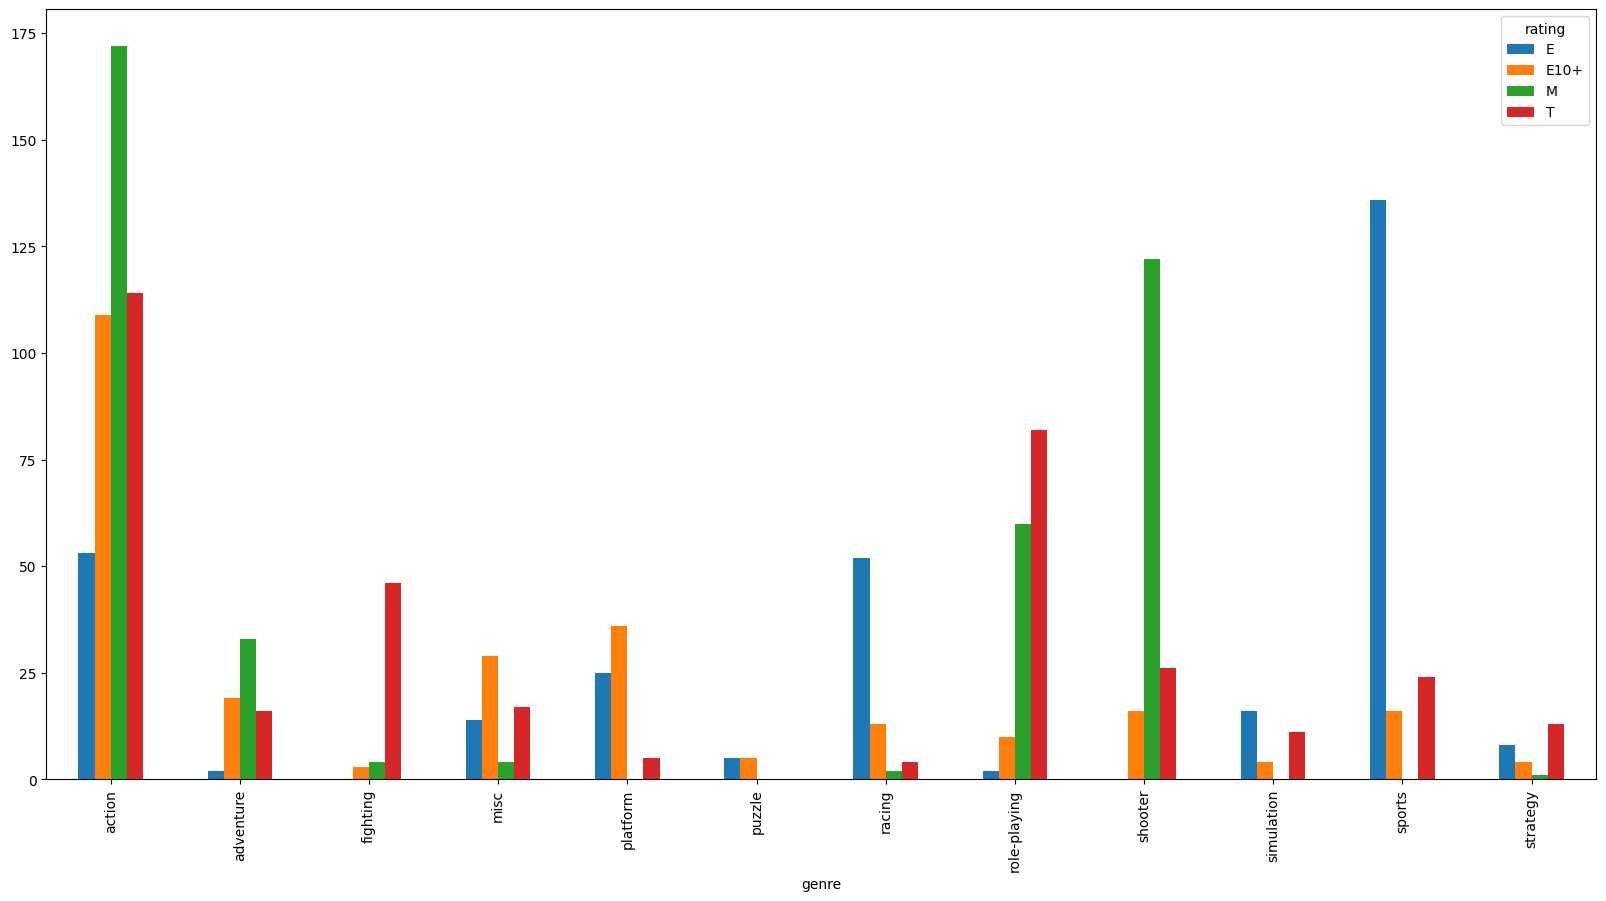

In [60]:
data.pivot_table(index=['genre'], columns=['rating'], values='sales', aggfunc='count').plot(kind='bar', figsize=(20,10))

<Axes: xlabel='platform'>

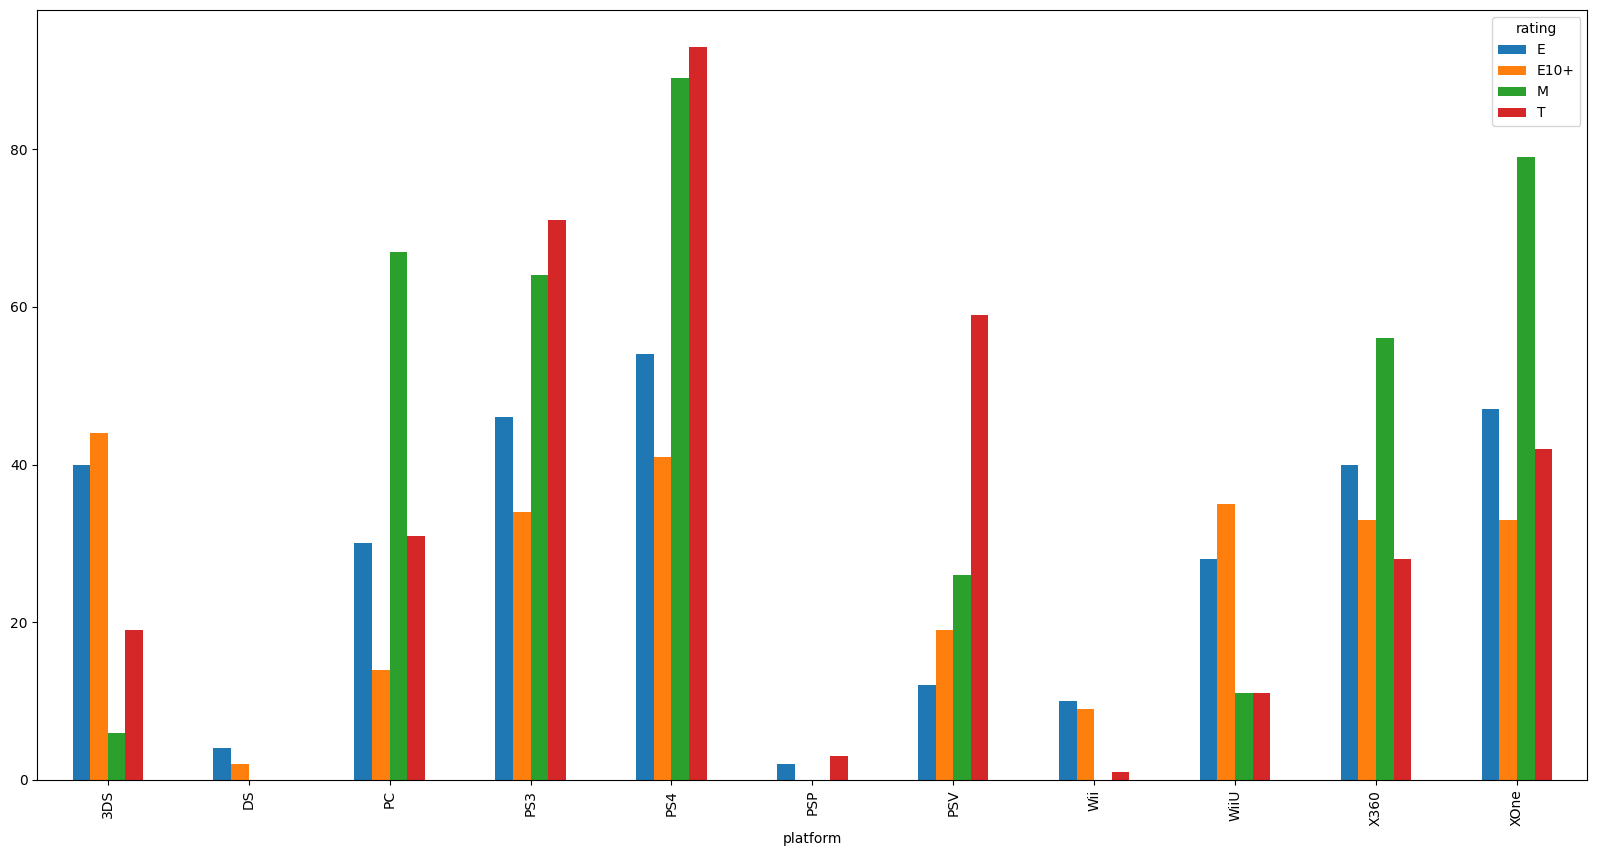

In [61]:
data.pivot_table(index=['platform'], columns=['rating'], values='sales', aggfunc='count').plot(kind='bar', figsize=(20,10))

Заполняем рейтинг по самому часто встречающемуся для каждого жанра

In [62]:
for g in data['genre'].unique():
    data.loc[data['genre'] == g, 'rating'] = rat_by_genre[g].idxmax()

В ходе обработки выбран период для дальнейшего анализа, в рамках этого периода заполнены пропущенные значения там, где это возможно. Можно переходить к исследовательскому анализу.

In [63]:
# check
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2233 entries, 16 to 16714
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             2233 non-null   object 
 1   platform         2233 non-null   object 
 2   year_of_release  2233 non-null   int64  
 3   genre            2233 non-null   object 
 4   na_sales         2233 non-null   float64
 5   eu_sales         2233 non-null   float64
 6   jp_sales         2233 non-null   float64
 7   other_sales      2233 non-null   float64
 8   critic_score     991 non-null    float64
 9   user_score       1192 non-null   float64
 10  rating           2233 non-null   object 
 11  lowercase_name   2233 non-null   object 
 12  sales            2233 non-null   float64
dtypes: float64(7), int64(1), object(5)
memory usage: 244.2+ KB


## Исследовательский анализ данных

Так как данные за 2016 год не полные, нужно привести данные к общему виду

### Заполнение данных за 2016 год

Найдем количество выпущенных игр по годам и сумму продаж

In [64]:
game_by_year = []
for y in range(2013, 2017):
    game_by_year.append(data.query('year_of_release == @y').pivot_table(index='lowercase_name', values='sales', aggfunc='sum').shape[0])

In [65]:
game_by_year

[335, 319, 362, 297]

<Axes: xlabel='year_of_release'>

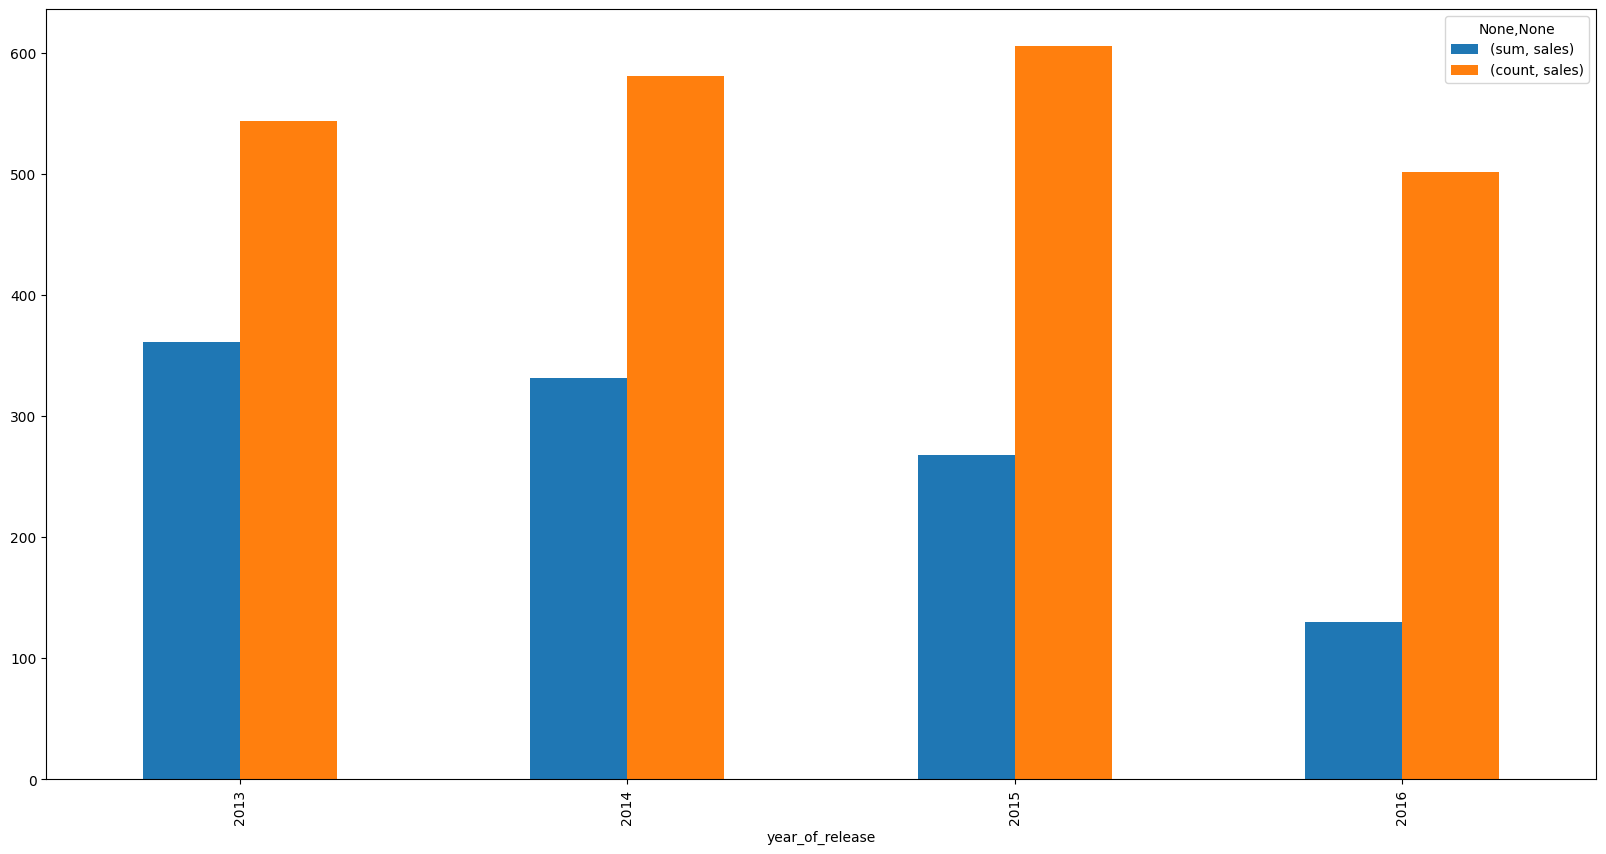

In [66]:
data.pivot_table(index='year_of_release', values='sales', aggfunc=['sum', 'count']).plot(kind='bar', figsize=(20, 10))

In [67]:
sales_by_year = data.pivot_table(index='year_of_release', values='sales', aggfunc=['sum', 'count'])
sales_by_year.columns = ['sales', 'count']
sales_by_year['game_by_year'] = game_by_year
sales_by_year['sales_by_game'] = sales_by_year['sales'] / sales_by_year['game_by_year']
sales_by_year

,sales,count,game_by_year,sales_by_game
year_of_release,,,,
2013,361.24,544,335,1.078328
2014,331.53,581,319,1.039279
2015,267.98,606,362,0.740276
2016,129.94,502,297,0.437508


<Axes: xlabel='year_of_release'>

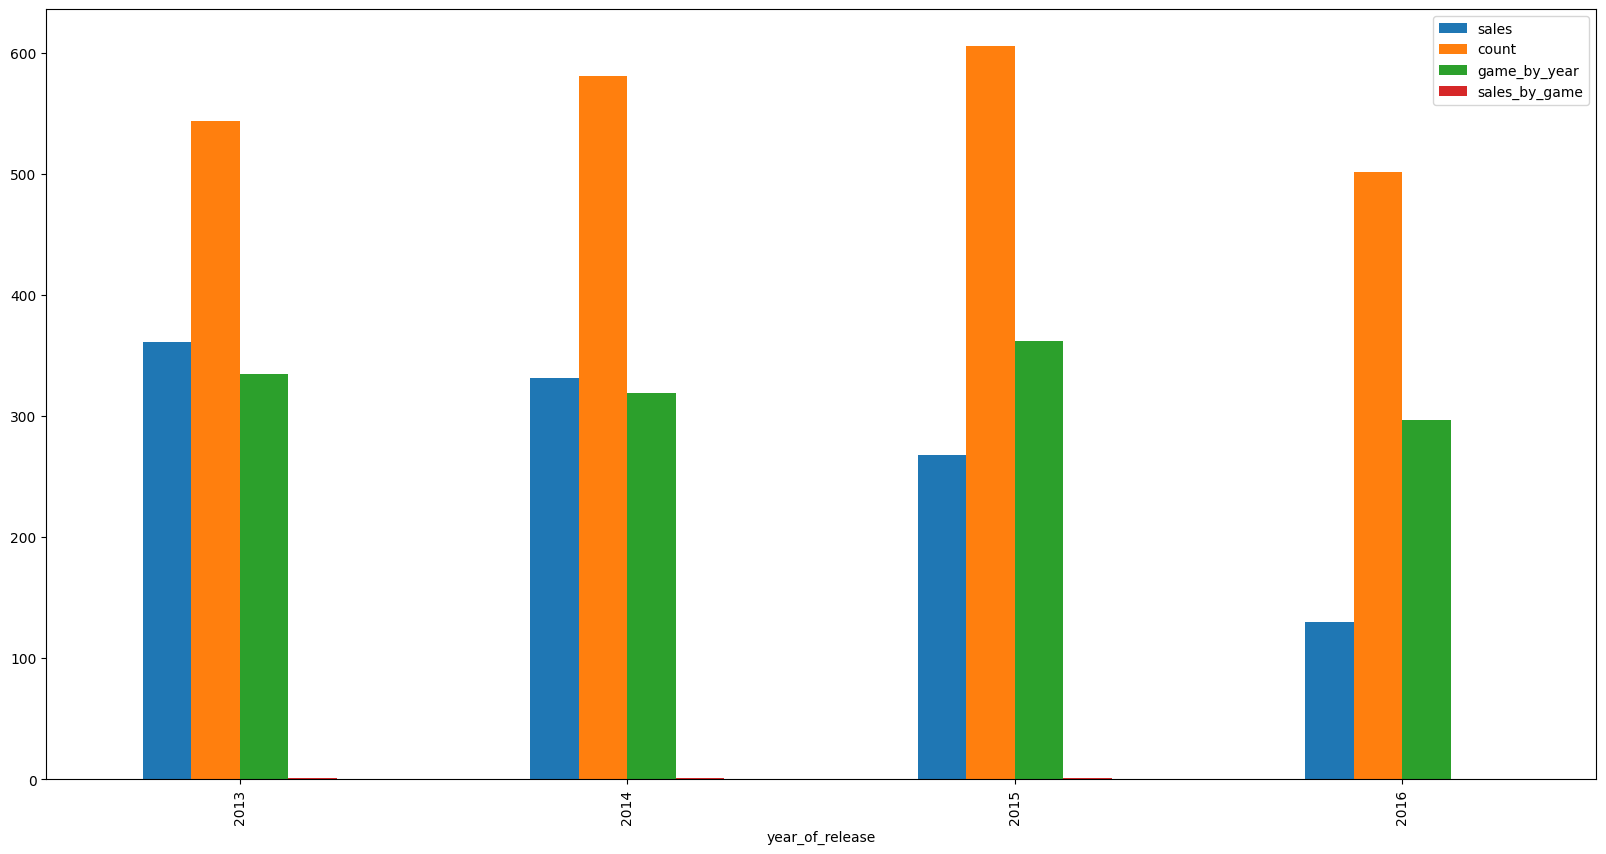

In [68]:
sales_by_year.plot(kind='bar', figsize=(20, 10))

Считаем насколько в среднем больше продаж каждой игры за 2013-2015 годы

In [69]:
sales_by_year.loc[:2015, 'sales_by_game'].mean()/sales_by_year.loc[2016, 'sales_by_game']

2.177393229326151

<Axes: xlabel='year_of_release'>

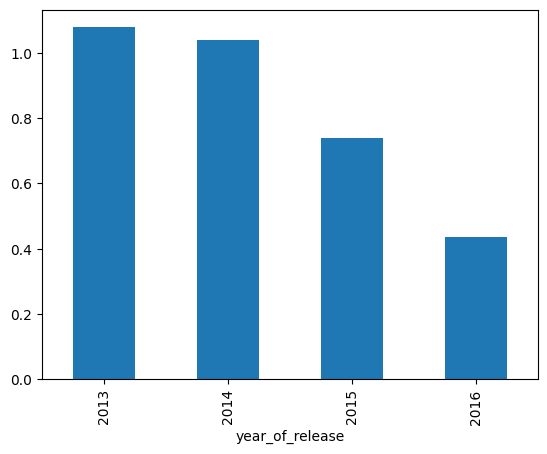

In [70]:
sales_by_year['sales_by_game'].plot(kind='bar')

Увеличим данные по продажам за 2016 год на коэффициенты (аналогично посчитанному выше) по каждому региону

In [71]:
sales_by_year_region = data.pivot_table(
    index='year_of_release', 
    values=['na_sales', 'eu_sales', 'jp_sales', 'other_sales','sales'], 
    aggfunc=['sum'])
sales_by_year_region.columns = ['eu_sales', 'jp_sales', 'na_sales', 'other_sales', 'sales']
sales_by_year_region
sales_by_year_region['game_by_year'] = game_by_year

In [72]:
game_by_year_eu = []
for y in range(2013, 2017):
    game_by_year_eu.append(
        data.query(
            'year_of_release == @y and eu_sales !=0'
        ).pivot_table(index='lowercase_name', values='sales', aggfunc='sum').shape[0]
    )
game_by_year_eu

[177, 176, 195, 149]

In [73]:
game_by_year_na = []
for y in range(2013, 2017):
    game_by_year_na.append(
        data.query(
            'year_of_release == @y and na_sales !=0'
        ).pivot_table(index='lowercase_name', values='sales', aggfunc='sum').shape[0])
game_by_year_na

[168, 172, 165, 145]

In [74]:
game_by_year_jp = []
for y in range(2013, 2017):
    game_by_year_jp.append(
        data.query(
            'year_of_release == @y and jp_sales !=0'
        ).pivot_table(index='lowercase_name', values='sales', aggfunc='sum').shape[0])
game_by_year_jp

[255, 238, 265, 183]

In [75]:
game_by_year_other = []
for y in range(2013, 2017):
    game_by_year_other.append(
        data.query(
            'year_of_release == @y and other_sales !=0'
        ).pivot_table(index='lowercase_name', values='sales', aggfunc='sum').shape[0])
game_by_year_other

[171, 172, 176, 128]

<Axes: xlabel='year_of_release'>

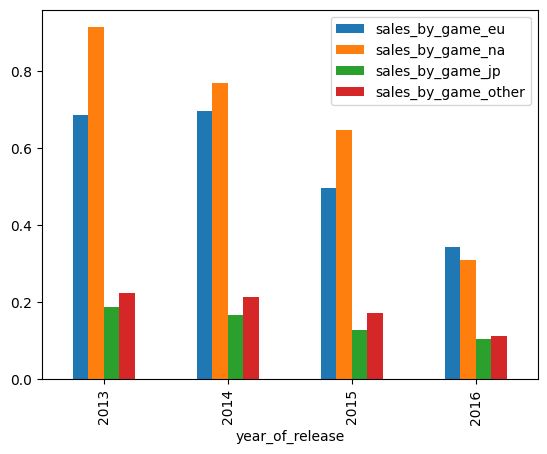

In [76]:
sales_by_year_region['game_by_year_eu'] = game_by_year_eu
sales_by_year_region['game_by_year_na'] = game_by_year_na
sales_by_year_region['game_by_year_jp'] = game_by_year_jp
sales_by_year_region['game_by_year_other'] = game_by_year_other
sales_by_year_region['sales_by_game_eu'] = sales_by_year_region['eu_sales'] / sales_by_year_region['game_by_year_eu']
sales_by_year_region['sales_by_game_na'] = sales_by_year_region['na_sales'] / sales_by_year_region['game_by_year_na']
sales_by_year_region['sales_by_game_jp'] = sales_by_year_region['jp_sales'] / sales_by_year_region['game_by_year_jp']
sales_by_year_region['sales_by_game_other'] = sales_by_year_region['other_sales'] / sales_by_year_region['game_by_year_other']
sales_by_year_region[['sales_by_game_eu', 'sales_by_game_na', 'sales_by_game_jp', 'sales_by_game_other']].plot(kind='bar')

In [77]:
k_eu = sales_by_year_region.loc[
    :2015, 'sales_by_game_eu'
].mean() / sales_by_year_region.loc[
    2016, 'sales_by_game_eu'
]

In [78]:
k_na = sales_by_year_region.loc[
    :2015, 'sales_by_game_na'
].mean() / sales_by_year_region.loc[
    2016, 'sales_by_game_na'
]

In [79]:
k_jp = sales_by_year_region.loc[
    :2015, 'sales_by_game_jp'
].mean() / sales_by_year_region.loc[
    2016, 'sales_by_game_jp'
]

In [80]:
k_other = sales_by_year_region.loc[
    :2015, 'sales_by_game_other'
].mean() / sales_by_year_region.loc[
    2016, 'sales_by_game_other'
]

In [81]:
data.loc[
    data['year_of_release'] == 2016, 'eu_sales'
] = data.loc[
    data['year_of_release'] == 2016, 'eu_sales'
] * k_eu

In [82]:
data.loc[
    data['year_of_release'] == 2016, 'na_sales'
] = data.loc[
    data['year_of_release'] == 2016, 'na_sales'
] * k_na

In [83]:
data.loc[
    data['year_of_release'] == 2016, 'jp_sales'
] = data.loc[
    data['year_of_release'] == 2016, 'jp_sales'
] * k_jp

In [84]:
data.loc[
    data['year_of_release'] == 2016, 'other_sales'
] = data.loc[
    data['year_of_release'] == 2016, 'other_sales'
] * k_other

In [85]:
data['sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

<Axes: xlabel='year_of_release'>

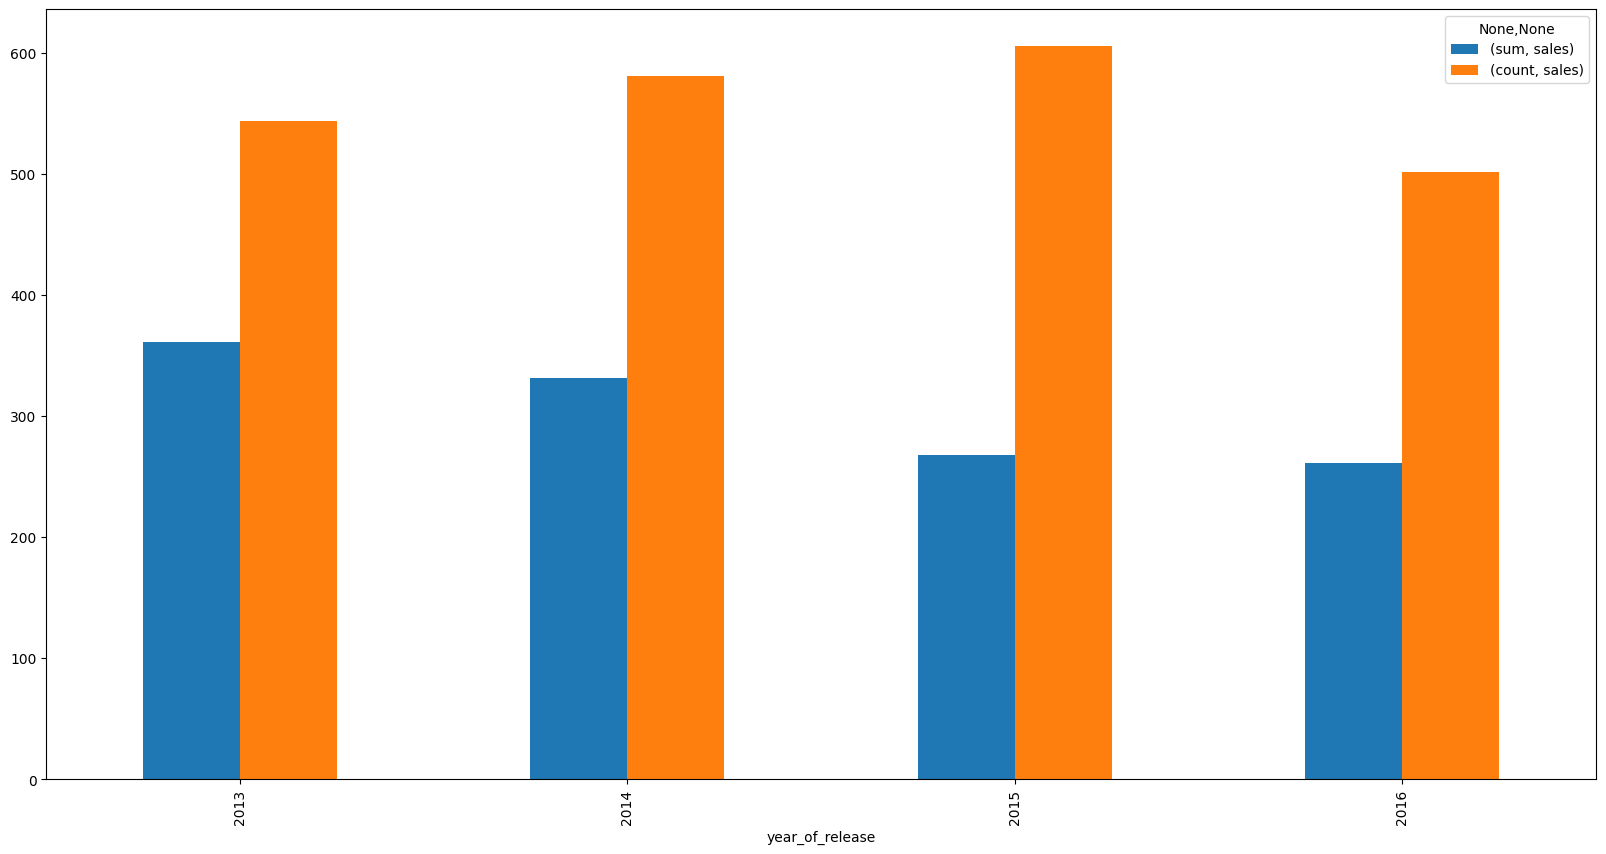

In [86]:
data.pivot_table(
    index='year_of_release', 
    values='sales', 
    aggfunc=['sum', 'count']
).plot(kind='bar', figsize=(20, 10))

In [87]:
sales_by_year = data.pivot_table(index='year_of_release', values='sales', aggfunc=['sum', 'count'])
sales_by_year.columns = ['sales', 'count']
sales_by_year['game_by_year'] = game_by_year
sales_by_year['sales_by_game'] = sales_by_year['sales'] / sales_by_year['game_by_year']
sales_by_year

,sales,count,game_by_year,sales_by_game
year_of_release,,,,
2013,361.240000,544,335,1.078328
2014,331.530000,581,319,1.039279
2015,267.980000,606,362,0.740276
2016,261.535743,502,297,0.880592


Так как количество игр в 2016 меньше, чем в 2010 - 2015 годах, общие продажи игр получились меньше, чем ранее

### Сравнение продаж игр по платформам

Построим график с продажами игр по каждому году и платформе

<Axes: xlabel='platform'>

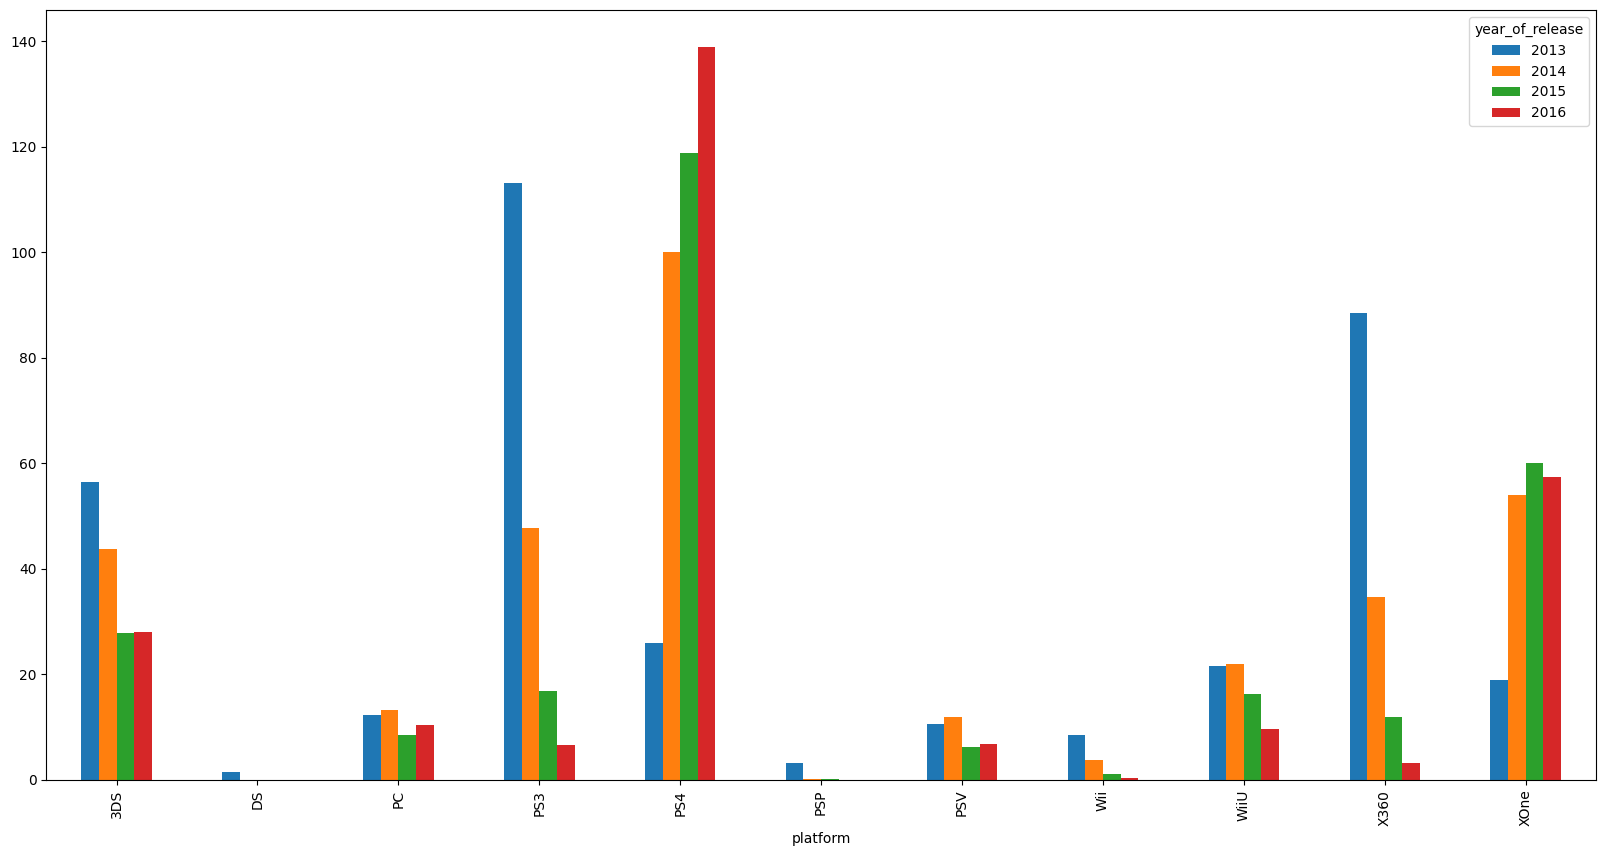

In [88]:
data.pivot_table(index='platform', columns='year_of_release', values='sales', aggfunc='sum').plot(kind='bar', figsize=(20, 10))

С учетом того, что срок выпуска игр на каждой платформе, кроме PC в среднем равен 7 годам, обычно после 5 года с выпущенными играми на платформе, продажи идут на спад. Исходя из этого, а также построенного графика, потенциально прибыльными платформами в 2017 году будут PS4, XOne, 3DS и PC.

Поделим платформы на типы и найдем самые популярные платформы в 2016 году в зависимости от типа:

In [89]:
data.loc[data['platform'].isin(['3DS', 'PSV']) , 'platform_type'] = 'handheld_console'
data.loc[data['platform'] == 'PC' , 'platform_type'] = 'pc'
data.loc[data['platform_type'].isna(), 'platform_type'] = 'home_console'

In [90]:
data.query('year_of_release == 2016').pivot_table(
    index=['platform_type', 'platform'], 
    values='sales', 
    aggfunc='sum'
).sort_values(by=['platform_type', 'sales'], ascending=False)

sales
platform_type    platform            
pc               PC         10.493867
nan              PS4       139.002545
                 XOne       57.388422
                 WiiU        9.615384
                 PS3         6.624216
                 X360        3.240696
                 Wii         0.369001
handheld_console 3DS        28.019196
                 PSV         6.782417

Самые популярные платформы: PC, PS4, XOne, 3DS

### Диаграммы размаха

Строим диаграммы рахмаха по продажам для каждой платформы

<Axes: title={'center': 'sales'}, xlabel='platform'>

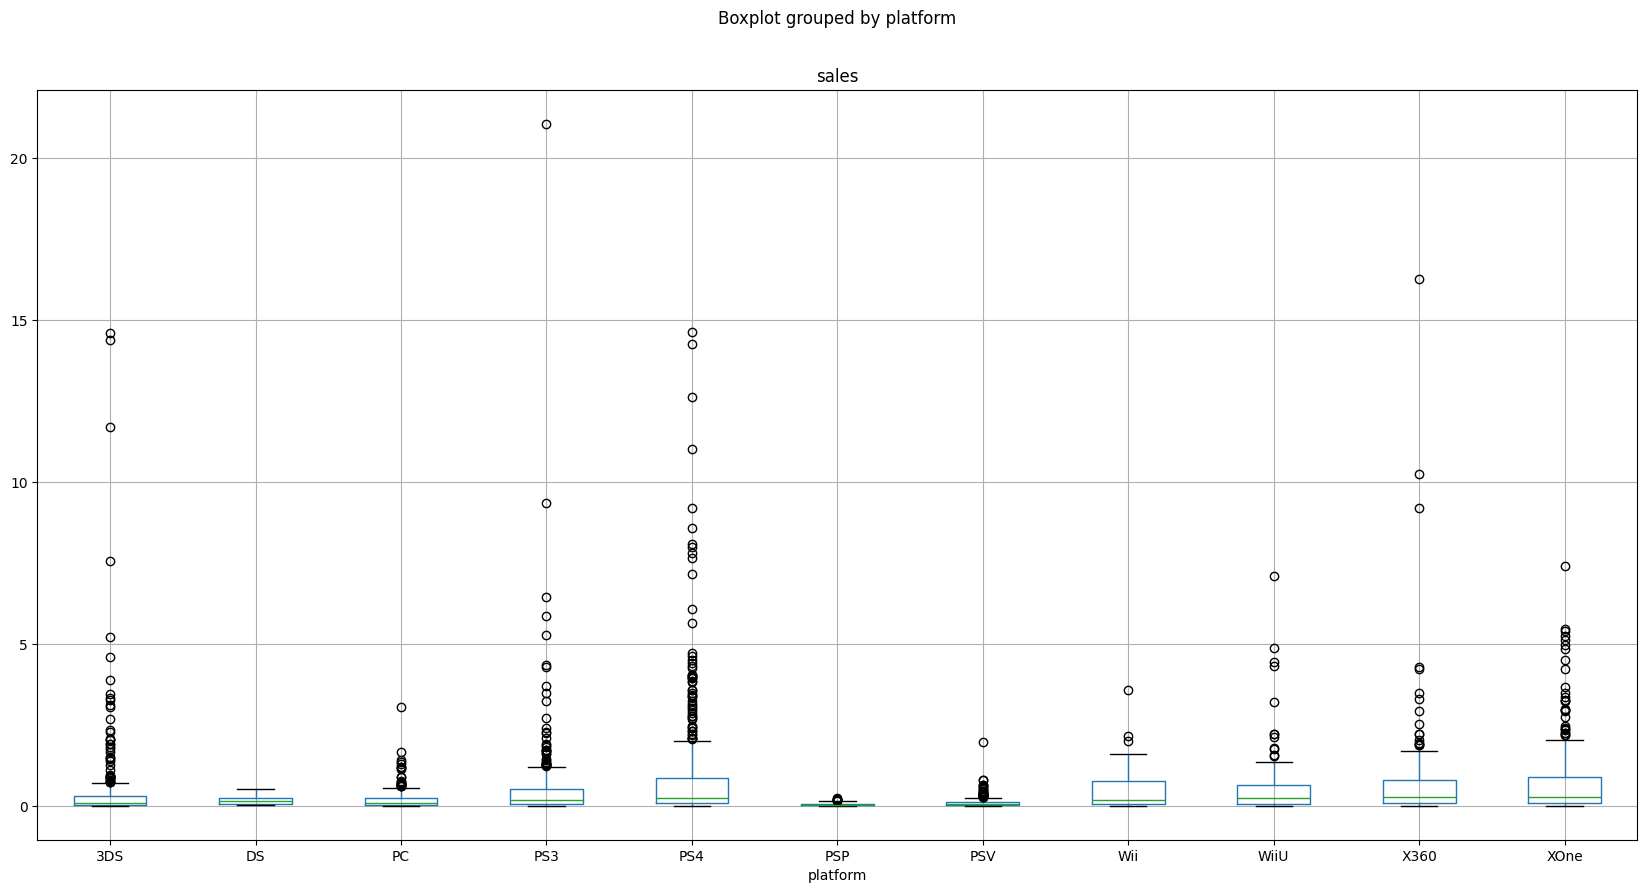

In [91]:
data.boxplot(
    column='sales', 
    by='platform',
    grid=True, 
    figsize=(20,10)
)

У каждой платформы есть набор самых продаваемых игр, которые на диаграммах размаха изображены как точки, у остальных игр выручка гораздо меньше.

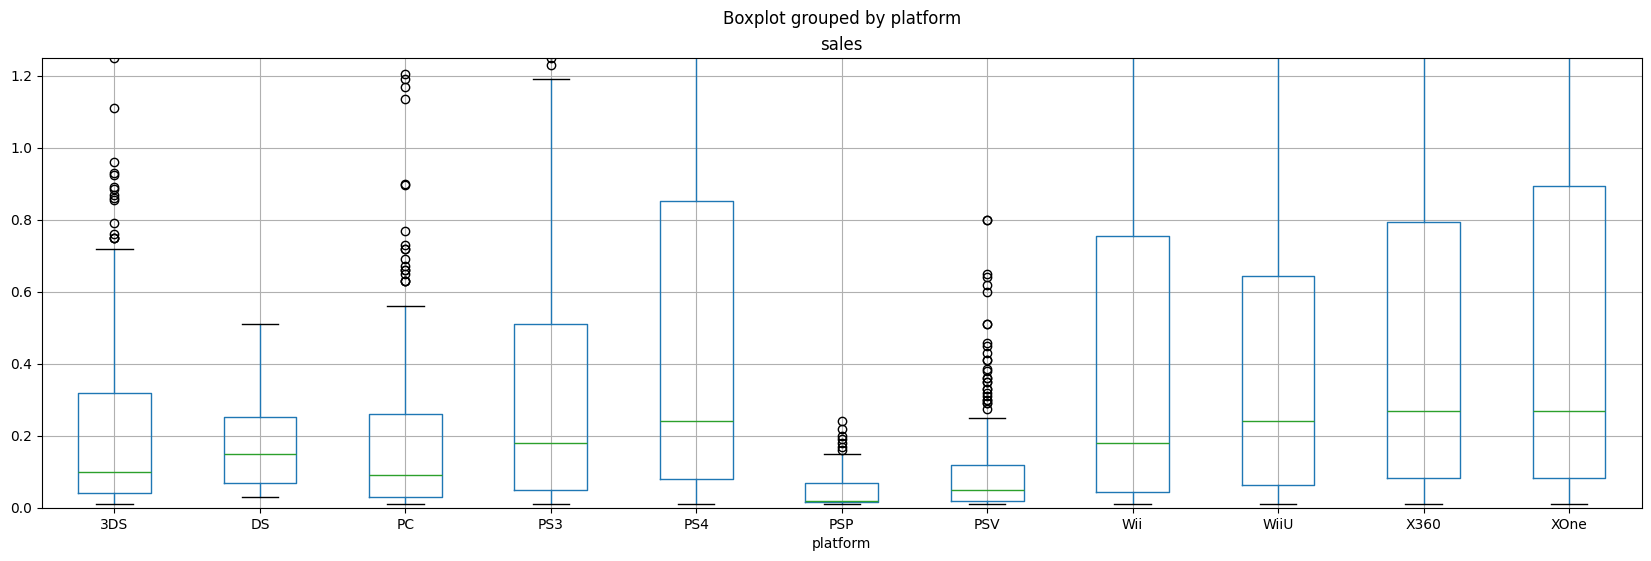

In [92]:
data.boxplot(
    column='sales', 
    by='platform',
    grid=True, 
    figsize=(20,6)
)
plt.ylim(0,1.25);

### Анализ оценок пользователей и критиков

Построим диаграммы рассеяния для самых популярных платформ в 2016 году: PS4, XOne. Будем искать зависимости продаж от оценки критиков и пользователей:

<Axes: xlabel='sales', ylabel='user_score'>

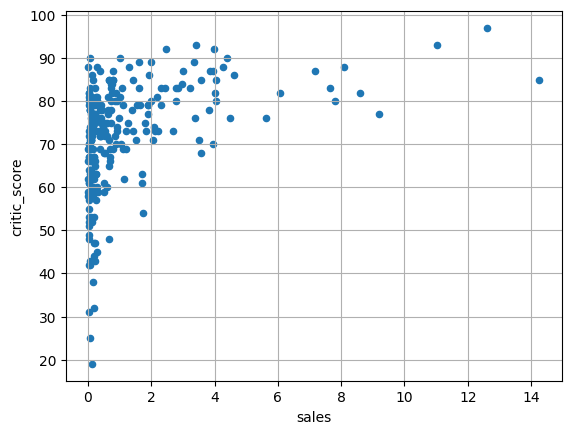

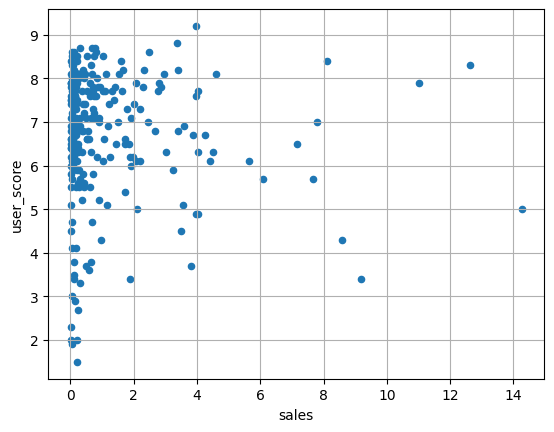

In [93]:
data.query('platform == "PS4"').plot(kind='scatter', x='sales', y='critic_score', grid=True)
data.query('platform == "PS4"').plot(kind='scatter', x='sales', y='user_score', grid=True)

In [94]:
data.query('platform == "PS4"')['sales'].corr(data.query('platform == "PS4"')['critic_score'])

0.40599876865041085

In [95]:
data.query('platform == "PS4"')['sales'].corr(data.query('platform == "PS4"')['user_score'])

-0.04475753336335664

Корреляция отзывов критиков и продаж средняя. Зависимость есть, но не явная. Можно сказать, что игры с продажами больше 4 млн имеют оценки критиков не ниже 70. Корреляции продаж и оценок пользователей нет.

<Axes: xlabel='sales', ylabel='user_score'>

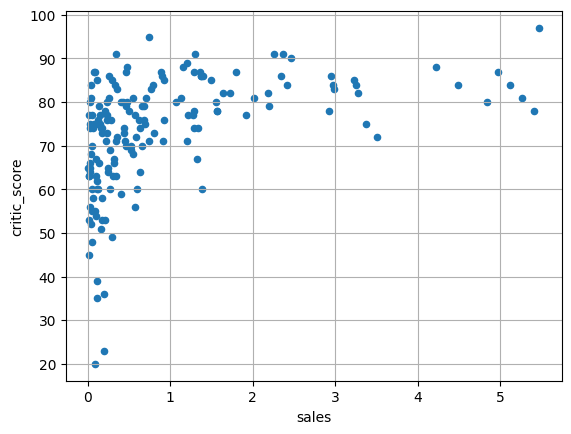

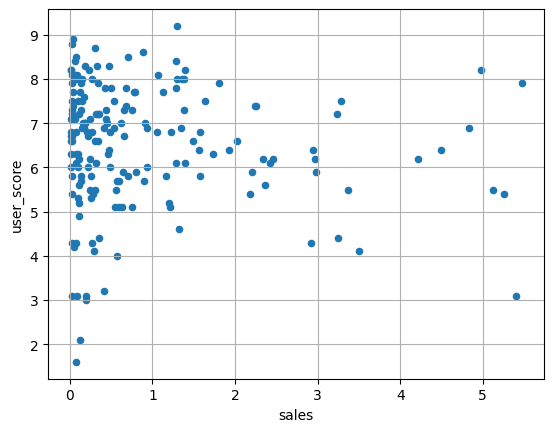

In [96]:
data.query('platform == "XOne"').plot(kind='scatter', x='sales', y='critic_score', grid=True)
data.query('platform == "XOne"').plot(kind='scatter', x='sales', y='user_score', grid=True)

In [97]:
data.query('platform == "XOne"')['sales'].corr(data.query('platform == "XOne"')['critic_score'])

0.4380611862293528

In [98]:
data.query('platform == "XOne"')['sales'].corr(data.query('platform == "XOne"')['user_score'])

-0.08213645446513039

Результаты получились похожие

Проверим корреляции на всех платформах

<Axes: xlabel='sales', ylabel='user_score'>

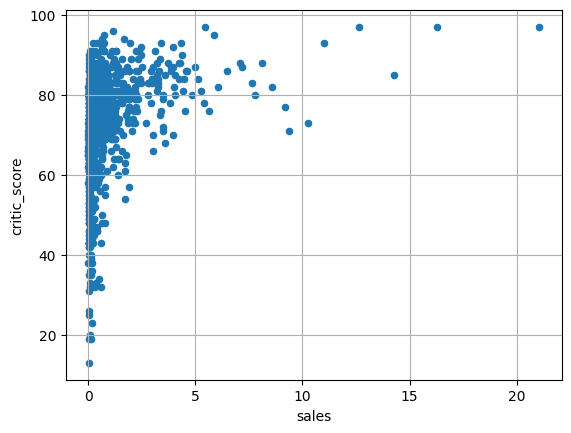

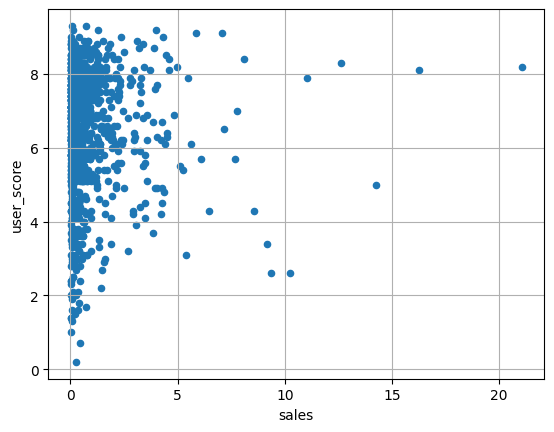

In [99]:
data.plot(kind='scatter', x='sales', y='critic_score', grid=True)
data.query('user_score != 0').plot(kind='scatter', x='sales', y='user_score', grid=True)

In [100]:
data['sales'].corr(data['critic_score'])

0.32392511073217173

In [101]:
data.query('user_score != 0')['sales'].corr(data.query('user_score != 0')['user_score'])

-0.007392567135654666

In [102]:
data.pivot_table(index='genre', values='user_score')

,user_score
genre,
action,6.837532
adventure,7.461667
fighting,7.037500
misc,6.975000
platform,6.713793
puzzle,7.471429
racing,6.080000
role-playing,7.376471
shooter,6.342308


В этом случае корреляция продаж и оценок критиков еще меньше.

In [103]:
data.corr(numeric_only=True)

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,sales
year_of_release,1.000000,-0.042083,-0.032601,-0.045003,-0.043271,0.064322,0.039318,-0.046512
na_sales,-0.042083,1.000000,0.737231,0.281552,0.809929,0.320289,-0.023804,0.918970
eu_sales,-0.032601,0.737231,1.000000,0.230110,0.928389,0.275755,-0.029289,0.917526
jp_sales,-0.045003,0.281552,0.230110,1.000000,0.195117,0.139916,0.198541,0.429752
other_sales,-0.043271,0.809929,0.928389,0.195117,1.000000,0.282138,-0.014487,0.923194
critic_score,0.064322,0.320289,0.275755,0.139916,0.282138,1.000000,0.502221,0.323925
user_score,0.039318,-0.023804,-0.029289,0.198541,-0.014487,0.502221,1.000000,-0.007393
sales,-0.046512,0.918970,0.917526,0.429752,0.923194,0.323925,-0.007393,1.000000


При этом, корреляция оценок критиков с продажами в Японии самая низкая.

Явной зависимости продаж от оценок не обнаружено

### Анализ продаж по жанрам

Построим график с продажами по жанрам и регионам

array([<Axes: title={'center': 'sales'}, xlabel='genre'>], dtype=object)

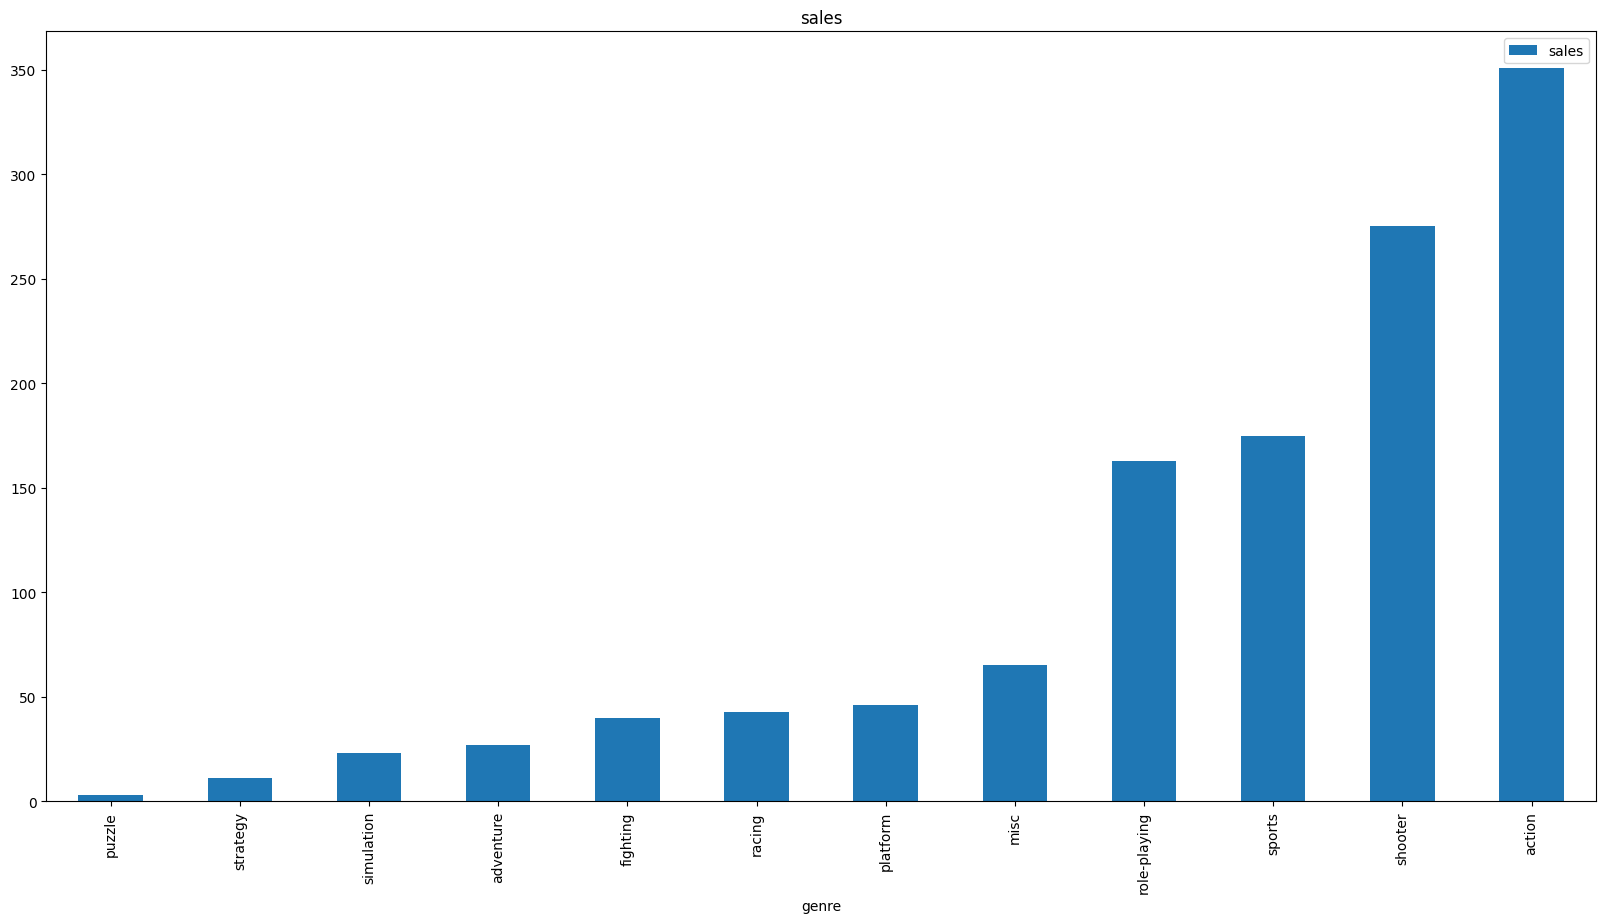

In [104]:
data.pivot_table(index='genre', 
                 values=['sales'], 
                 aggfunc='sum').sort_values('sales').plot(kind='bar', figsize=(20,10), subplots=True)

Самые продаваемые жанры: action, shooter, sports и role-playing

In [105]:
data.query('genre in ["action", "shooter", "sports", "role-playing"]')['sales'].sum() / data['sales'].sum()

0.7883788854724699

На них приходится 78% от всех продаж

Жанры с самыми низкими продажами: puzzle и strategy

Проверим среднюю выручку с одной игры для каждого жанра

In [106]:
sales_by_genre = data.pivot_table(index='genre', 
                                  values=['sales', 'eu_sales', 'na_sales', 'jp_sales', 'other_sales'], 
                                  aggfunc='sum')

In [107]:
sales_by_genre.sort_values('sales', ascending=False)

,eu_sales,jp_sales,na_sales,other_sales,sales
genre,,,,,
action,126.920623,44.194510,140.057612,39.653628,350.826373
shooter,100.947163,7.165414,134.226935,32.782122,275.121634
sports,70.405335,5.892058,76.638934,21.863667,174.799994
role-playing,40.492834,54.503481,55.281037,12.598918,162.876270
misc,20.583241,9.744935,28.635940,6.201892,65.166008
platform,16.724098,4.847637,20.085083,4.471660,46.128478
racing,21.646873,2.305240,14.060706,4.663784,42.676602
fighting,9.652943,8.042982,18.324382,3.991583,40.011890
adventure,9.336481,6.438292,8.572425,2.725714,27.072913


In [108]:
def g_b_g(s):
    games_by_genre = []
    for g in data['genre'].unique():
        games_by_genre.append(
            data.loc[(data['genre'] == g)&(data[s] != 0)].pivot_table(
                index=['name', 'genre'], 
                values=s, 
                aggfunc='count'
            ).shape[0]
        )
    return games_by_genre

In [109]:
sales_by_genre['games_by_genre'] = g_b_g('sales')
sales_by_genre['games_by_genre_eu'] = g_b_g('eu_sales')
sales_by_genre['games_by_genre_na'] = g_b_g('na_sales')
sales_by_genre['games_by_genre_jp'] = g_b_g('jp_sales')
sales_by_genre['games_by_genre_other'] = g_b_g('other_sales')
sales_by_genre['sales_by_game'] = sales_by_genre['sales'] / sales_by_genre['games_by_genre']
sales_by_genre['sales_by_game_eu'] = sales_by_genre['eu_sales'] / sales_by_genre['games_by_genre_eu']
sales_by_genre['sales_by_game_na'] = sales_by_genre['na_sales'] / sales_by_genre['games_by_genre_na']
sales_by_genre['sales_by_game_jp'] = sales_by_genre['jp_sales'] / sales_by_genre['games_by_genre_jp']
sales_by_genre['sales_by_game_other'] = sales_by_genre['other_sales'] / sales_by_genre['games_by_genre_other']

In [110]:
sales_by_genre = sales_by_genre[[
    'sales_by_game',
    'sales_by_game_eu',
    'sales_by_game_na',
    'sales_by_game_jp',
    'sales_by_game_other'
]]

In [111]:
sales_by_game = sales_by_genre.sort_values('sales_by_game', ascending=False)
sales_by_game

,sales_by_game,sales_by_game_eu,sales_by_game_na,sales_by_game_jp,sales_by_game_other
genre,,,,,
shooter,7.435720,3.364905,4.194592,0.286617,1.057488
role-playing,3.393256,1.306220,3.455065,2.725174,0.663101
racing,1.185461,0.676465,0.484852,0.109773,0.141327
sports,0.976536,1.676318,2.071323,0.040635,0.624676
strategy,0.925330,0.672232,0.910469,0.315086,0.173189
action,0.872702,0.610195,0.748971,0.154526,0.221529
misc,0.638882,0.514581,0.715899,0.124935,0.177197
platform,0.615046,0.315549,0.393825,0.138504,0.079851
simulation,0.555319,0.498555,0.340083,0.234646,0.097744


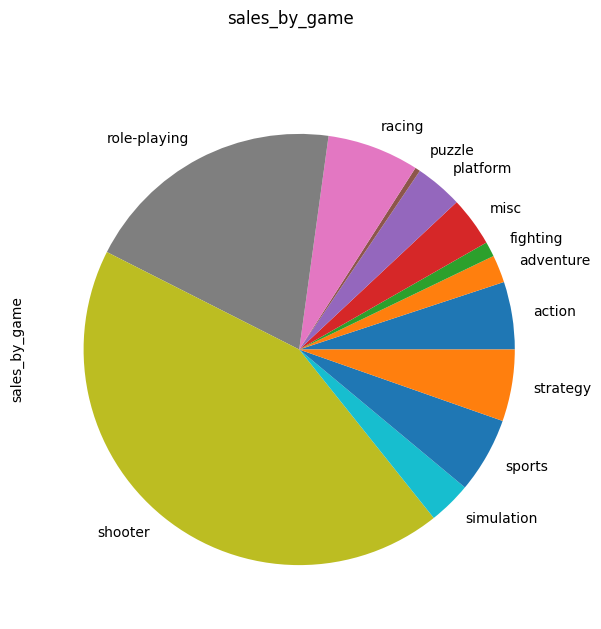

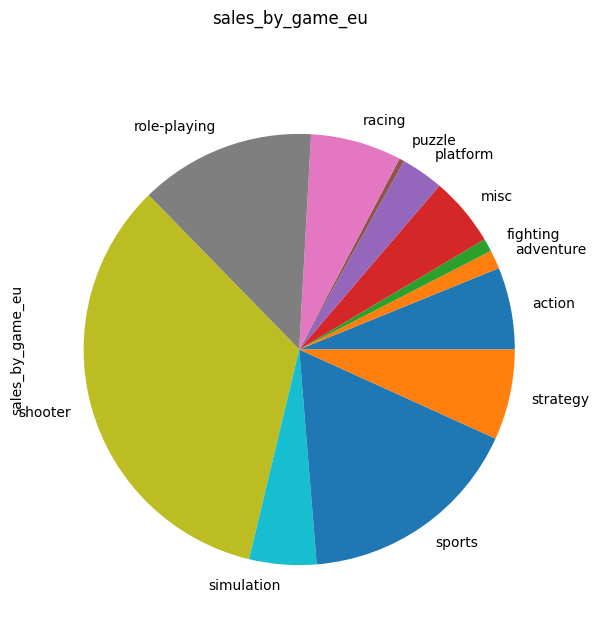

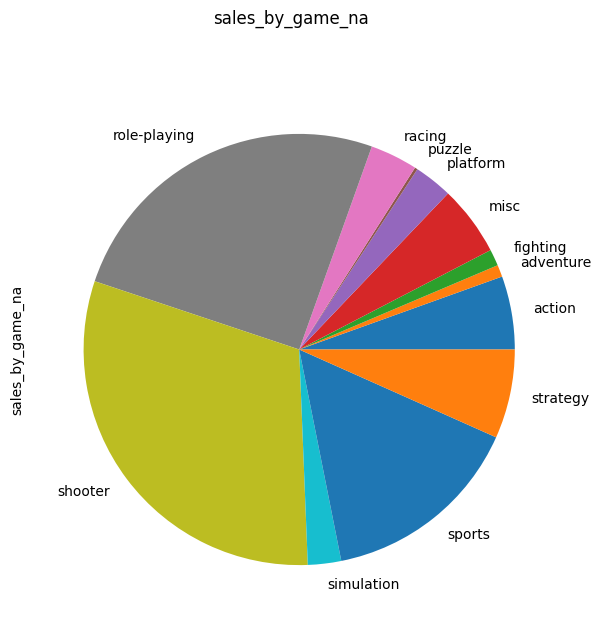

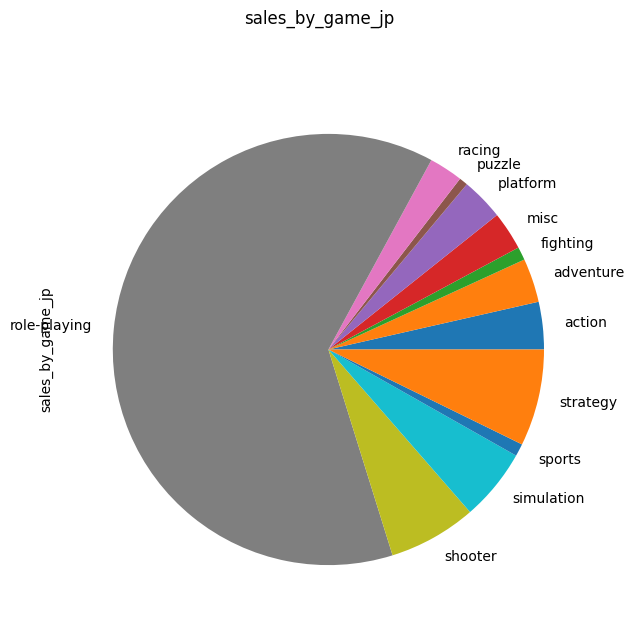

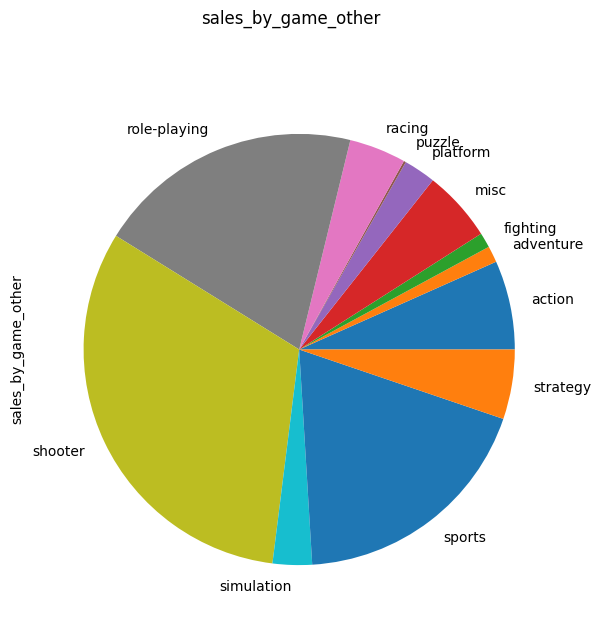

In [112]:
for i in sales_by_genre.columns:
    sales_by_genre.plot(kind='pie', y=i, subplots=True, figsize=(7,7), legend=False, title=i)

Судя по графику самая большая средняя выручка за одну игру у жанра shooter, самая маленькая у жанра puzzle. При этом в Японии на 1 месте по данному показателю жанр role-playing.

array([<Axes: ylabel='action'>, <Axes: ylabel='misc'>,
       <Axes: ylabel='role-playing'>, <Axes: ylabel='shooter'>],
      dtype=object)

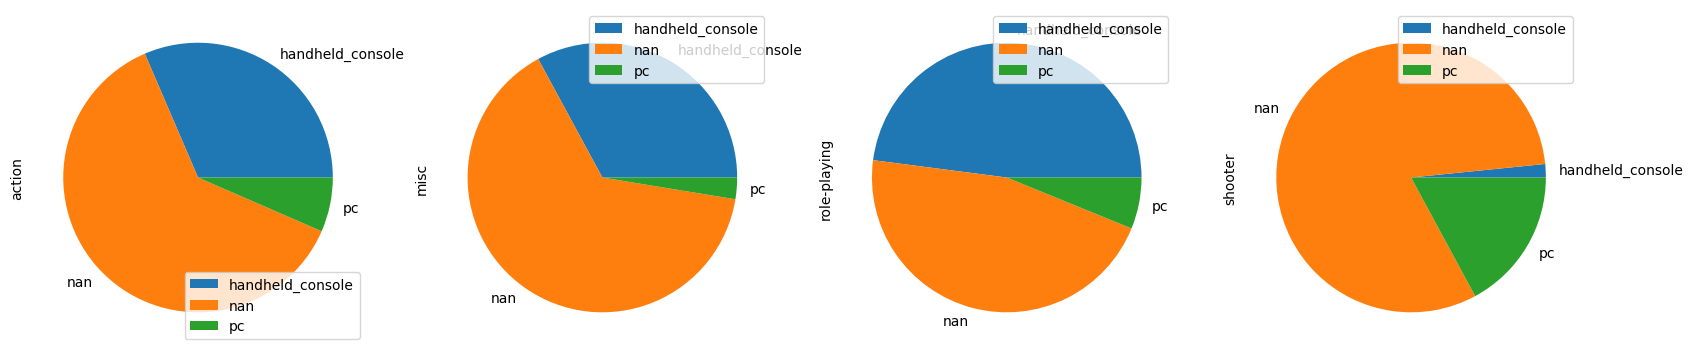

In [113]:
data.query(
    'genre.isin(["shooter", "action", "role-playing", "misc"])'
).pivot_table(
    index='platform_type', 
    columns='genre', 
    values='sales', 
    aggfunc='count'
).plot(kind='pie', subplots=True ,figsize=(20,10))

Игр жанра misc на PC практически не бывает, при этом шутеров на PC выпускается больше других популярных жанров, а на портативных консолях практически не бывает шутеров, но много игр жанра role-playing

array([<Axes: title={'center': 'action'}, xlabel='platform'>,
       <Axes: title={'center': 'misc'}, xlabel='platform'>,
       <Axes: title={'center': 'role-playing'}, xlabel='platform'>,
       <Axes: title={'center': 'shooter'}, xlabel='platform'>],
      dtype=object)

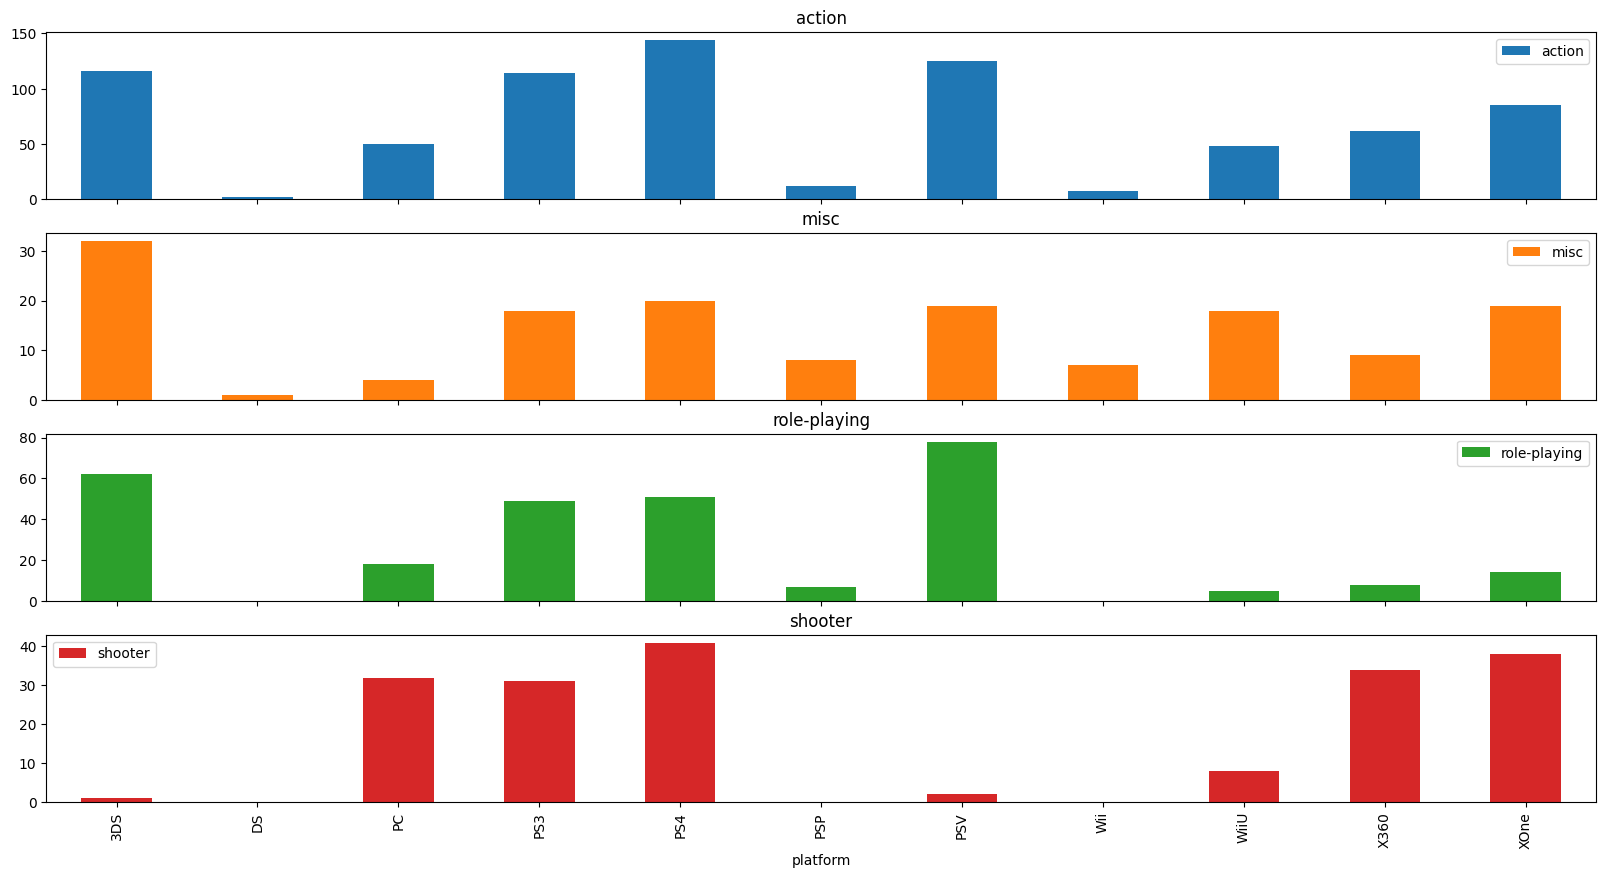

In [114]:
data.query(
    'genre.isin(["shooter", "action", "role-playing", "misc"])'
).pivot_table(
    index='platform', 
    columns='genre', 
    values='sales', 
    aggfunc='count'
).plot(kind='bar', subplots=True, figsize=(20,10))

<Axes: title={'center': 'sales'}, xlabel='genre'>

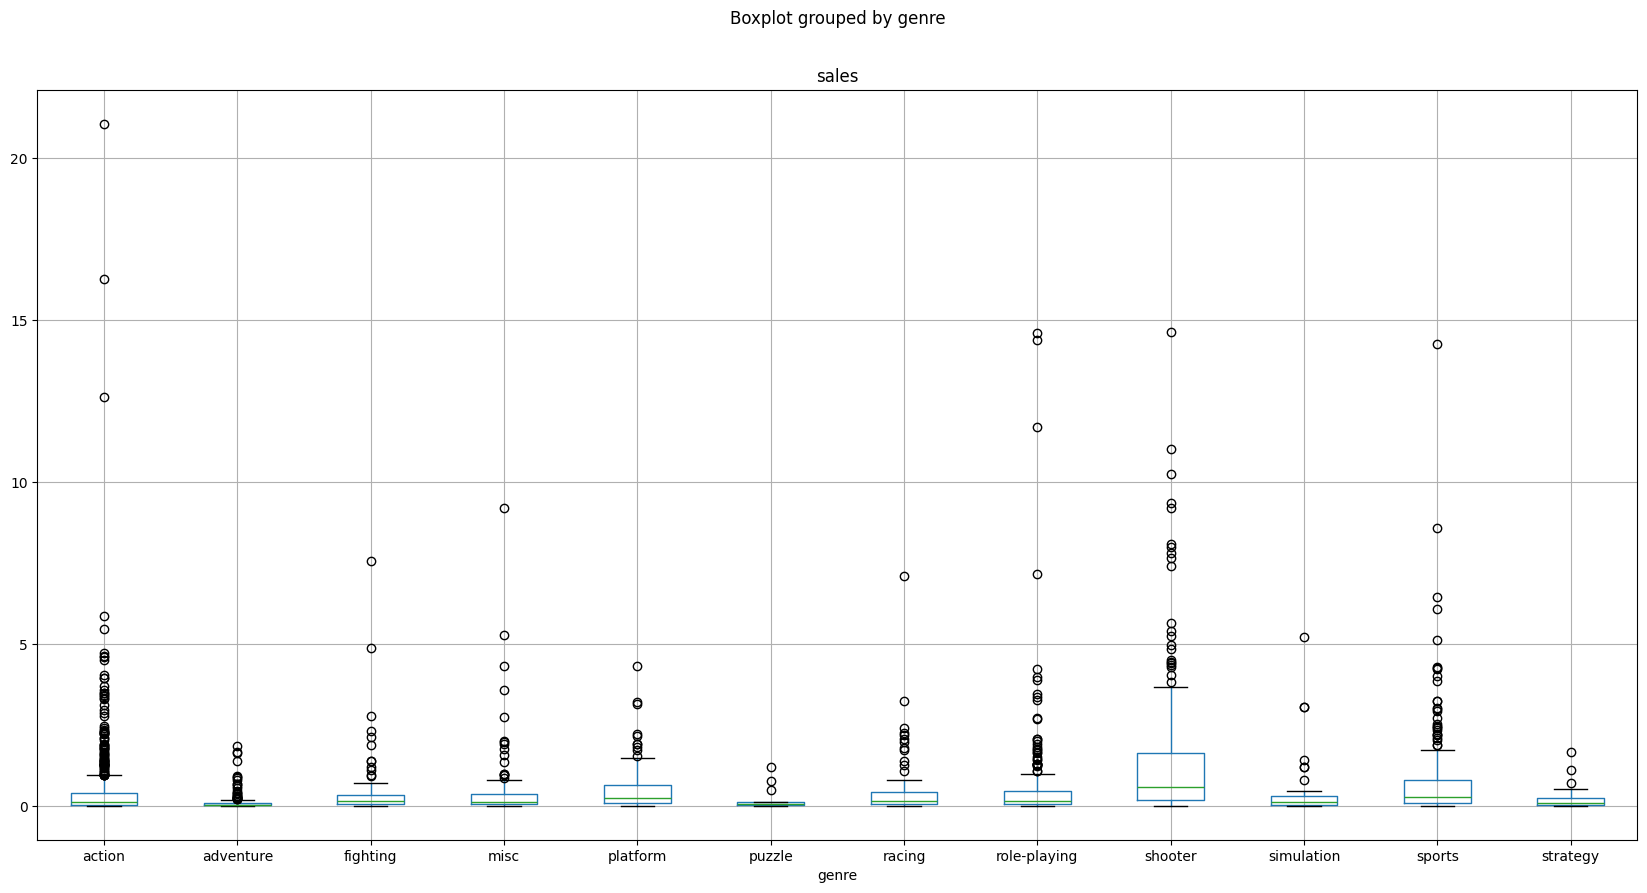

In [115]:
data.boxplot(
    column='sales', 
    by='genre',
    grid=True, 
    figsize=(20,10)
)

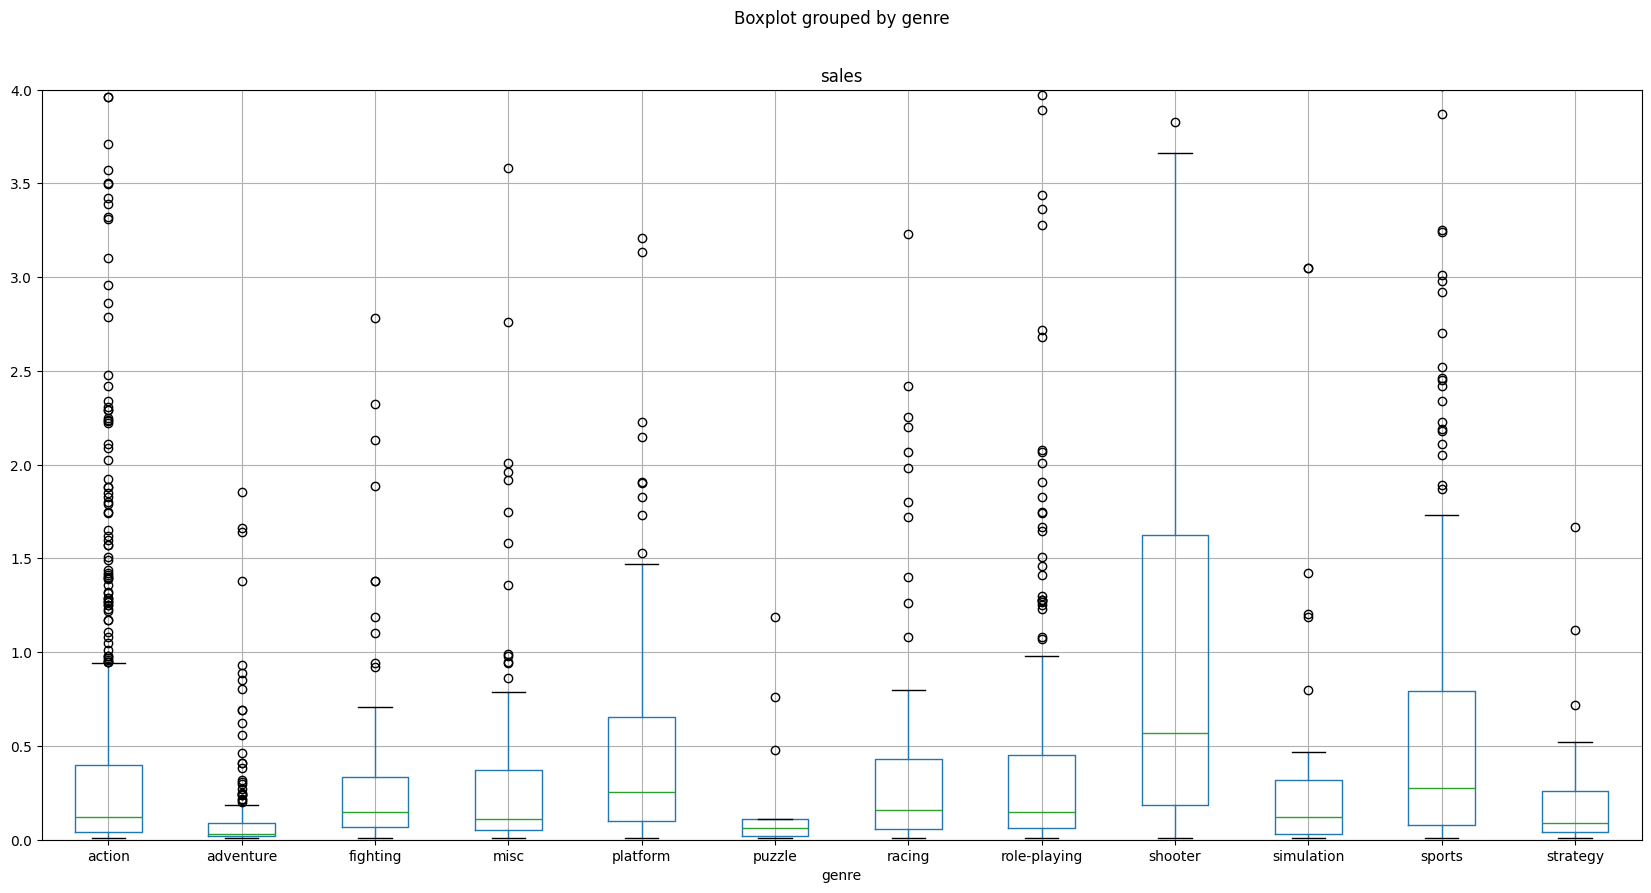

In [116]:
data.boxplot(
    column='sales', 
    by='genre',
    grid=True, 
    figsize=(20,10)
)
plt.ylim(0,4);

Посмотрим на средние и медианые значения продаж по жанрам

<Axes: xlabel='genre'>

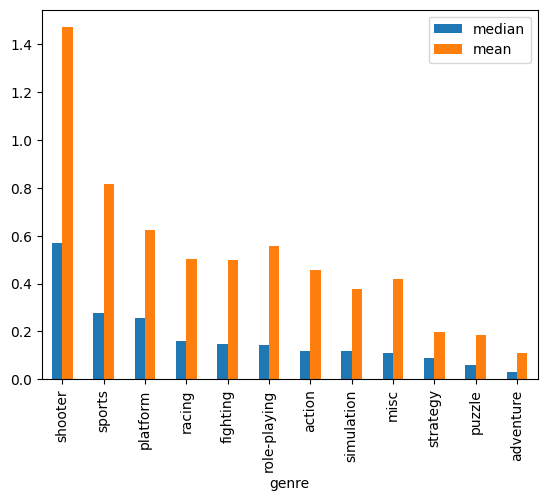

In [117]:
sales_by_genre_mean = data.pivot_table(
  index='genre', 
    values='sales', 
    aggfunc=['median', 'mean']
)
sales_by_genre_mean.columns = ['median', 'mean']
sales_by_genre_mean.sort_values('median', ascending=False).plot(kind='bar')

Жанры platform, racing и fighting продаются меньше, но средние значения у них достаточно высокие, значит есть несколько игр, которые продаются очень хорошо в данных категориях

Были заполнены данные за 2016 год; были найдены самые популярные платформы в 2016 году: PC, PS4, 3DS; выяснилось, что на каждой платформе есть сравнительно небольшое количество самых продаваемых игр, которые формируют большую часть выручки; проверены зависимости оценок пользователей и критиков на продажи: есть средняя корреляция между оценками критиков и продажами; найдены самые продаваемые жанры: action, shooter, sports и role-playing; самая большая средняя выручка за одну игру у жанра shooter.

## Портреты пользователей регионов

### Регион NA

Топ-5 платформ по продажам:

In [118]:
def top5(sign, region):
    top_platform = (data
                    .groupby(sign)[[region]]
                    .sum()
                    .sort_values(region, ascending=False)
                    )
    return pd.concat([top_platform.head(),
                      pd.DataFrame([top_platform.drop(top_platform.head().index).sum()], index=['other'])]
                     )

In [119]:
top5('platform', 'na_sales')

,na_sales
PS4,141.142970
XOne,114.636537
X360,82.700393
PS3,64.510237
3DS,44.442359
other,58.023685


Топ-5 жанров по продажам:

In [120]:
top5('genre', 'na_sales')

,na_sales
action,140.057612
shooter,134.226935
sports,76.638934
role-playing,55.281037
misc,28.635940
other,70.615722


Топ-5 жанров по продажам одной игры вне зависимости от платформы:

In [121]:
def s_b_g(region):
    sbg = sales_by_genre[[region]].sort_values(region, ascending=False)
    return pd.concat([
        sbg.head(),
        pd.DataFrame([sbg.tail(sbg.shape[0] - 5).sum()], index=['other'])
    ])

In [122]:
s_b_g('sales_by_game_na')

,sales_by_game_na
shooter,4.194592
role-playing,3.455065
sports,2.071323
strategy,0.910469
action,0.748971
other,2.253856


### Регион EU

Топ-5 платформ по продажам:

In [123]:
top5('platform', 'eu_sales')

,eu_sales
PS4,167.247864
PS3,68.847096
XOne,59.516376
X360,43.104395
3DS,32.877804
other,62.795237


Топ-5 жанров по продажам:

In [124]:
top5('genre', 'eu_sales')

,eu_sales
action,126.920623
shooter,100.947163
sports,70.405335
role-playing,40.492834
racing,21.646873
other,73.975945


Топ-5 жанров по продажам одной игры вне зависимости от платформы:

In [125]:
s_b_g('sales_by_game_eu')

,sales_by_game_eu
shooter,3.364905
sports,1.676318
role-playing,1.306220
racing,0.676465
strategy,0.672232
other,2.212102


### Регион JP

Топ-5 платформ по продажам:

In [126]:
top5('platform', 'jp_sales')

,jp_sales
3DS,72.017527
PS3,24.031169
PSV,20.455354
PS4,18.967622
WiiU,11.231064
other,4.195240


Топ-5 жанров по продажам:

In [127]:
top5('platform', 'jp_sales')

,jp_sales
3DS,72.017527
PS3,24.031169
PSV,20.455354
PS4,18.967622
WiiU,11.231064
other,4.195240


Топ-5 жанров по продажам каждой игры вне зависимости от платформы:

In [128]:
s_b_g('sales_by_game_jp')

,sales_by_game_jp
role-playing,2.725174
strategy,0.315086
shooter,0.286617
simulation,0.234646
action,0.154526
other,0.627797


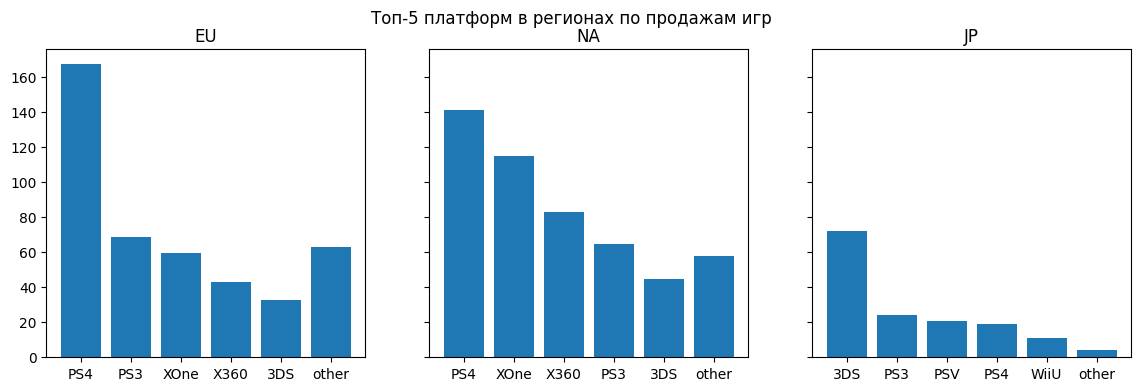

In [129]:
fig, axs = plt.subplots(1, 3, figsize=(14, 4), sharey = True)
fig.suptitle('Топ-5 платформ в регионах по продажам игр')
axs[0].bar(top5('platform', 'eu_sales').reset_index()['index'], 
           top5('platform', 'eu_sales').reset_index()['eu_sales'])
axs[0].set_title('EU')
axs[1].bar(top5('platform', 'na_sales').reset_index()['index'], 
           top5('platform', 'na_sales').reset_index()['na_sales'])
axs[1].set_title('NA')
axs[2].bar(top5('platform', 'jp_sales').reset_index()['index'], 
           top5('platform', 'jp_sales').reset_index()['jp_sales'])
axs[2].set_title('JP');

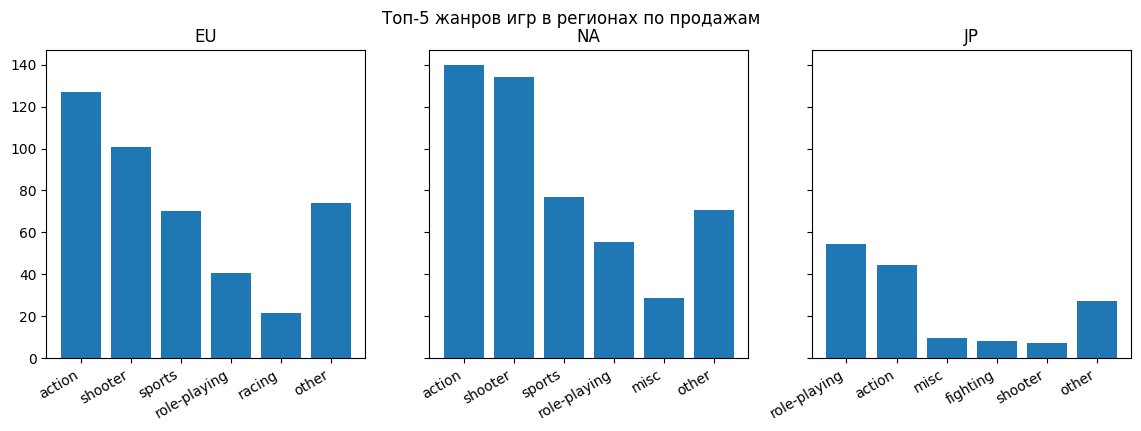

In [130]:
fig, axs = plt.subplots(1, 3, figsize=(14, 4), sharey = True)
fig.suptitle('Топ-5 жанров игр в регионах по продажам')
axs[0].bar(top5('genre', 'eu_sales').reset_index()['index'], 
           top5('genre', 'eu_sales').reset_index()['eu_sales'])
axs[0].set_title('EU')
plt.setp(axs[0].get_xticklabels(), rotation=30, ha='right')
axs[1].bar(top5('genre', 'na_sales').reset_index()['index'], 
           top5('genre', 'na_sales').reset_index()['na_sales'])
axs[1].set_title('NA')
plt.setp(axs[1].get_xticklabels(), rotation=30, ha='right')
axs[2].bar(top5('genre', 'jp_sales').reset_index()['index'], 
           top5('genre', 'jp_sales').reset_index()['jp_sales'])
axs[2].set_title('JP')
plt.setp(axs[2].get_xticklabels(), rotation=30, ha='right');

[None, None, None, None, None, None, None, None, None, None, None, None]

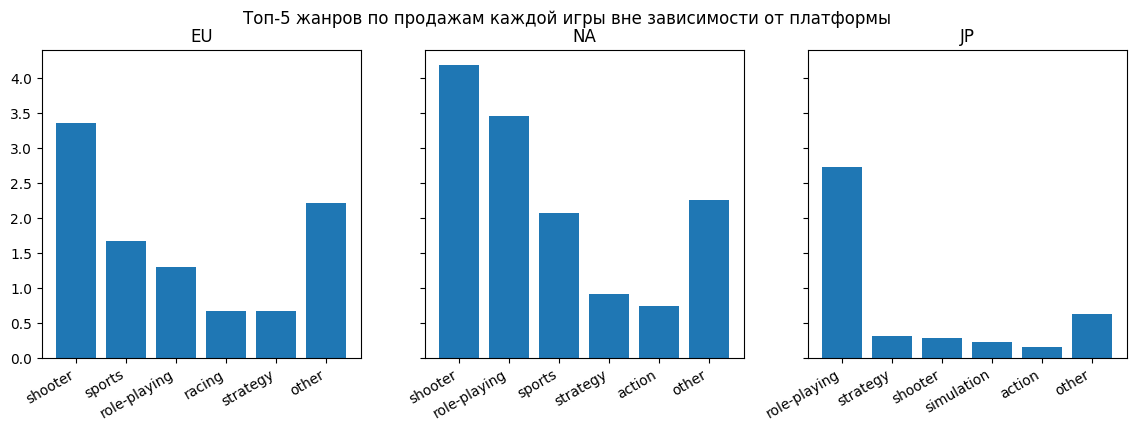

In [131]:
fig, axs = plt.subplots(1, 3, figsize=(14, 4), sharey = True)
fig.suptitle('Топ-5 жанров по продажам каждой игры вне зависимости от платформы')
axs[0].bar(s_b_g('sales_by_game_eu').reset_index().reset_index()['index'], 
           s_b_g('sales_by_game_eu').reset_index().reset_index()['sales_by_game_eu'])
axs[0].set_title('EU')
plt.setp(axs[0].get_xticklabels(), rotation=30, ha='right')
axs[1].bar(s_b_g('sales_by_game_na').reset_index()['index'], 
           s_b_g('sales_by_game_na').reset_index().reset_index()['sales_by_game_na'])
axs[1].set_title('NA')
plt.setp(axs[1].get_xticklabels(), rotation=30, ha='right')
axs[2].bar(s_b_g('sales_by_game_jp').reset_index()['index'], 
           s_b_g('sales_by_game_jp').reset_index()['sales_by_game_jp'])
axs[2].set_title('JP')
plt.setp(axs[2].get_xticklabels(), rotation=30, ha='right')

Также построим графики в одном масштабе

<Axes: >

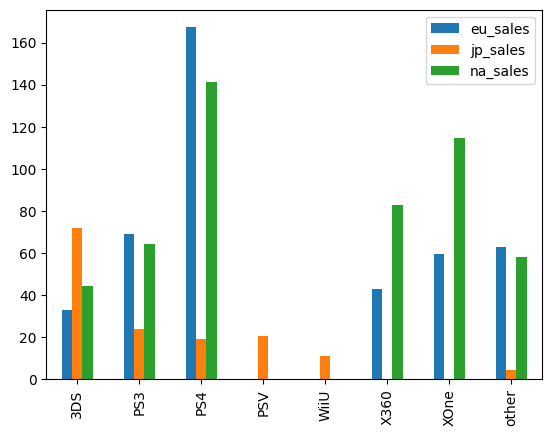

In [132]:
top5('platform', 'eu_sales').join(
    top5('platform', 'jp_sales'), how='outer'
).join(
    top5('platform', 'na_sales'), how='outer'
).plot(kind='bar')

<Axes: >

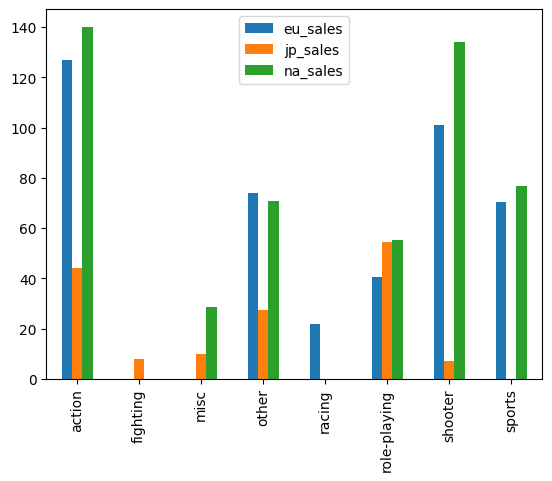

In [133]:
top5('genre', 'eu_sales').join(
    top5('genre', 'jp_sales'), how='outer'
).join(
    top5('genre', 'na_sales'), how='outer'
).plot(kind='bar')

### Анализ рейтина ESRB

array([<Axes: title={'center': 'eu_sales'}, xlabel='rating'>,
       <Axes: title={'center': 'jp_sales'}, xlabel='rating'>,
       <Axes: title={'center': 'na_sales'}, xlabel='rating'>],
      dtype=object)

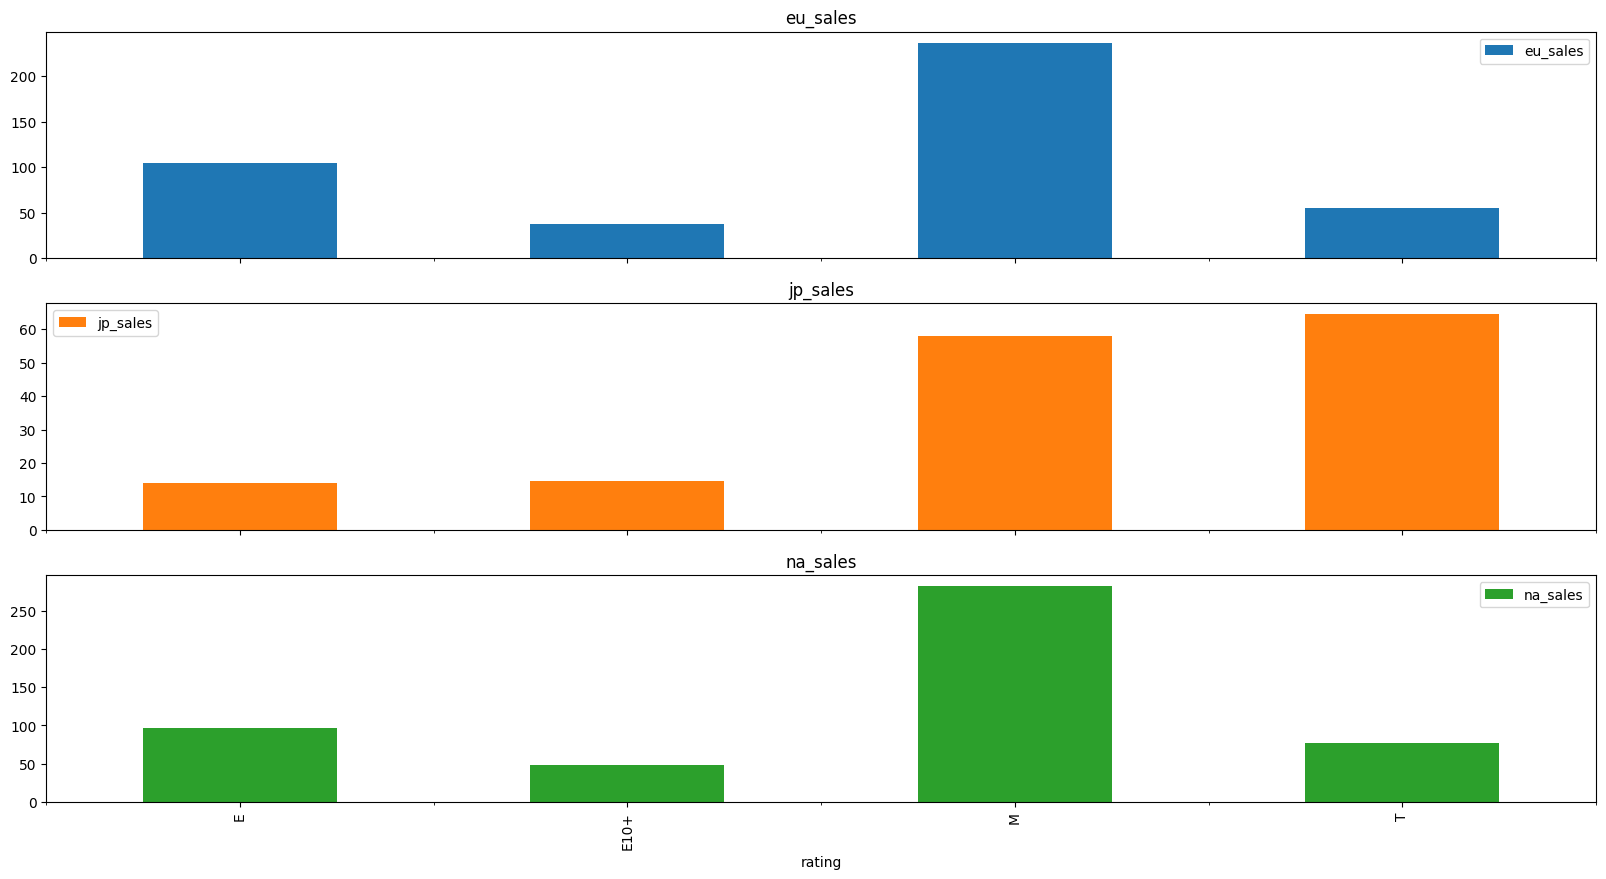

In [134]:
data.pivot_table(
    index='rating', 
    values=['na_sales', 'eu_sales', 'jp_sales'], 
    aggfunc='sum'
).plot(kind='bar', subplots=True, figsize=(20,10))

In [135]:
data.pivot_table(index='rating', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum')

,eu_sales,jp_sales,na_sales
rating,,,
E,105.025766,14.070210,96.630890
E10+,37.307339,14.592572,48.721023
M,237.204267,57.798216,282.856972
T,54.851401,64.436977,77.247295


In [136]:
data.query('rating == "T"').sort_values('jp_sales', ascending=False)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,lowercase_name,sales,platform_type
33,Pokemon X/Pokemon Y,3DS,2013,role-playing,5.280000,4.190000,4.350000,0.780000,NaN,NaN,T,pokemon x/pokemon y,14.600000,handheld_console
108,Pokemon Sun/Moon,3DS,2016,role-playing,7.473292,2.643483,3.444186,0.809652,NaN,NaN,T,pokemon sun/moon,14.370614,handheld_console
385,Monster Hunter 4,3DS,2013,role-playing,0.000000,0.000000,3.440000,0.000000,NaN,NaN,T,monster hunter 4,3.440000,handheld_console
412,Yokai Watch 2 Ganso/Honke,3DS,2014,role-playing,0.090000,0.000000,3.180000,0.010000,NaN,NaN,T,yokai watch 2 ganso/honke,3.280000,handheld_console
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,role-playing,4.350000,3.490000,3.100000,0.740000,NaN,NaN,T,pokemon omega ruby/pokemon alpha sapphire,11.680000,handheld_console
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10794,Etrian Odyssey 2 Untold: Knight of Fafnir,3DS,2014,role-playing,0.070000,0.020000,0.000000,0.010000,NaN,NaN,T,etrian odyssey 2 untold: knight of fafnir,0.100000,handheld_console
11014,Digimon All-Star Rumble,PS3,2014,fighting,0.060000,0.020000,0.000000,0.020000,49.0,5.8,T,digimon all-star rumble,0.100000,nan
11129,Might & Magic Heroes VII,PC,2015,strategy,0.000000,0.080000,0.000000,0.000000,NaN,NaN,T,might & magic heroes vii,0.080000,pc
11187,Risen 3: Titan Lords,PC,2014,role-playing,0.000000,0.080000,0.000000,0.000000,65.0,5.7,T,risen 3: titan lords,0.080000,pc


По графику видно, что в Японии игры с рейтингом T продаются чаще, чем в Европе и Северной Америке. Как видно выше на это повлияли игры жанра role-playing, которые чаще продаются в Японии, а также то, что в Японии популярна платформа 3DS, игры для которой чаще имеют такой рейтинг.

## Проверка гипотез

Необходимо проверить следующие гипотезы:
1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
2. Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

### Проверка гипотезы 1

Нулевая гипотеза: средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Альтернативная гипотеза: средние пользовательские рейтинги платформ Xbox One и PC разные

Применяем метод для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам.

Необходимо узнать размеры выборок

In [137]:
data.query('platform == "PC" or platform == "XOne"').pivot_table(index='platform', values='user_score', aggfunc='count')

,user_score
platform,
PC,155
XOne,182


Проводим тест:

In [138]:
results = st.ttest_ind(
    data.query('platform == "PC" and user_score.isna() == False')['user_score'], 
    data.query('platform == "XOne" and user_score.isna() == False')['user_score'],
    equal_var = False
)
print('p-значение:', results.pvalue)
if results.pvalue < .05:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 0.14759594013430466
Не получилось отвергнуть нулевую гипотезу


В ходе теста отвергнуть гипотезу о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые не удалось. p-значение > 0,05, а значит вероятность того, что пользовательские рейтинги платформ Xbox One и PC равны достаточно высока чтобы не отвергнуть это утверждение.

### Проверка гипотезы 2

Нулевая гипотеза: средние пользовательские рейтинги жанров Action и Sports одинаковые

Альтернативная гипотеза: средние пользовательские рейтинги жанров Action и Sports разные

Применяем метод для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам.

Необходимо узнать размеры выборок

In [139]:
data.query('genre == "action" or genre == "sports"').pivot_table(index='genre', values='user_score', aggfunc='count')

,user_score
genre,
action,389
sports,160


Проводим тест:

In [140]:
results = st.ttest_ind(
    data.query('genre == "action" and user_score.isna() == False')['user_score'], 
    data.query('genre == "sports" and user_score.isna() == False')['user_score'],
    equal_var = False
)
print('p-значение:', results.pvalue)
if results.pvalue < .05:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 1.4460039700704315e-20
Отвергаем нулевую гипотезу


В ходе теста гипотеза о том, что средние пользовательские рейтинги жанров Action и Sports одинаковые отвергнута. Значит, средние пользовательские рейтинги жанров Action и Sports разные 

## Вывод

В ходе исследования данных об играх были обработаны следующие параметры: изменены типы данных в столбцах, найдены пропуски в данных, возникшие из-за их отсутсвия в разные временные промежутки. Были изучены показатели продаж в разных регионах и рейтинги критиков и пользователей. Был выявлен актуальный период для дальнейшего анализа, а также заполнены данные за весь 2016 год.
Выяснились следующие закономерности:
+ Самые популярные платформы: PC, PS4, 3DS
+ У каждой платформы есть набор самых продаваемых игр, у остальных игр выручка гораздо меньше
+ Есть корреляция между отзывамт критиков и продажами
+ Самые продаваемые жанры: action, shooter, sports и role-playing
+ Самая большая средняя выручка за одну игру у жанра shooter

Были проверены 2 гипотезы: отвергнуть гипотезу о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые не удалось, средние пользовательские рейтинги жанров Action и Sports разные.